# **Cesarean Section Prediction using Maternal Health Data (NFHS-5)**<img src="pregnant_logo.png" alt="Logo" style="height:60px;">

Notebook by **Vaibhav Aggarwal**  
Supported by Dr. Himani Madhar (MBBS)  
*University of Colorado, Boulder*  

> **Github repository:** https://github.com/vaibhavagg101/C-Section_Prediction_ML.git
> 
> **Presentation video:** 

## Introduction

This project aims to predict whether a pregnancy will result in a cesarean section using a dataset containing maternal demographic and health-related attributes. By analyzing factors such as age, antenatal care frequency, medical history, and lifestyle habits, the model will assist healthcare providers in identifying pregnancies likely to require surgical intervention.

Cesarean section (C-section) is a surgical procedure used to deliver a baby through incisions made in the abdomen and uterus. While this method can be life-saving for both the mother and the baby in specific medical situations, unnecessary or elective cesarean deliveries carry substantial risks and long-term health implications, including infections, increased recovery times, and future pregnancy complications.

**Motivation:** 
Accurate prediction of cesarean sections during pregnancy can significantly enhance maternal healthcare management in India through:

- Timely Interventions in Rural and Semi-Urban Areas: Early identification of high-risk pregnancies allows healthcare workers, including ASHA workers and local healthcare providers, to intervene promptly, potentially preventing complications, especially in underserved regions.

- Optimized Resource Allocation in Public Health Facilities: Accurate predictions help government hospitals and community health centers efficiently allocate limited resources, such as surgical teams, operation theatres, and blood banks, ensuring readiness even in remote or resource-constrained settings.

- Reduction of Unnecessary Cesarean Deliveries: By accurately identifying low-risk pregnancies, healthcare facilities can avoid unnecessary cesarean sections, thus reducing surgical risks, hospital stays, and financial burdens on families, particularly relevant in areas with limited insurance coverage.

- Enhanced Emergency Preparedness in Primary Health Centers (PHCs): Improved predictive accuracy enables PHCs and district hospitals to be better prepared with necessary supplies, skilled medical personnel, and emergency transportation facilities for high-risk pregnancies.

- Culturally Relevant Counseling and Community Support: Women identified as high-risk can receive culturally tailored counseling, involving family and community participation, addressing common fears and myths associated with cesarean deliveries, thereby improving mental well-being and decision-making.

- Preventive Measures in Line with National Health Programs: Early risk detection aligns with India’s national maternal health initiatives like Janani Suraksha Yojana (JSY) and Pradhan Mantri Surakshit Matritva Abhiyan (PMSMA), enabling preventive strategies such as nutritional interventions, monitoring for hypertension and diabetes, and providing antenatal care at grassroots levels.

**Type of Task:** Supervised Learning Binary Classification<br>Predicting whether a pregnancy will result in a cesarean section (1) or not (0).

**Type of Algorithms:** The following machine learning algorithms have been selected due to their proven performance in binary classification problems and their interpretability:

- Logistic Regression

- K-Nearest Neighbors (KNN)

- Random Forests

- AdaBoost (Adaptive Boosting)

**Data Source:** The dataset utilized in this study was obtained from the National Family Health Survey (NFHS-5), specifically the individual women's dataset, containing detailed responses from over 700,000 women across India. This data was accessed through the International Institute for Population Sciences (IIPS) data catalog upon formal request.  
*Citation: International Institute for Population Sciences (IIPS). (2021). National Family Health Survey (NFHS-5), 2019-21: Individual Women's Data. Retrieved from https://iipsdata.ac.in*

## Dataset
The dataset is tabulated data retrieved in the form of .DAT and .SPS which were converted to .CSV using 'pspp' in linux environment. Since the data included more than 700,000 samples and null values for 'cesarean_section', it was filtered using 'awk', 'grep' and other linux commands to attain 40,000 samples containing non-null for 'cesarean_section'.  
The dataset also included a .MAP file which is to be used to map the column names in the dataframe. A file named 'column_mapping.csv' is created and present in the project directory to use later for mapping.

**Size:** 485 MB (509,605,194 bytes)  
**Number of samples:** 40,000  
**Number of features:** 5972  
**Data types:** 410 are integers and 5562 are objects  
*Object types are integers as well but contain empty string ' ' instead of NaN, hence treated as object type (later rectified).*<br><br>
**Description of some features:**

- M1 - Number of tetanus injections before birth - An injection that protects the mother from infection during bleeding
- M2A - Prenatal: doctor - Whether doctor was available before conception
- ML1 - NA - Number of times took fansidar during pregnancy - A drug used to treat malaria but harful to the fetus
- S414 - Received antenatal care for pregnancy - Whether care was given to the mother during pregnancy before birth
- S419E - Abdomen examined - Whether the abdomen (middle part of the body) was checked by the doctor during antenatal visit
- S420B - Told about pregnancy complication: convulsions - A complication that causes involuntary muscle contractions and relaxations that cause uncontrollable shaking of the body

The depository includes a questionnaire pdf as well which was used while surverying to acquire this data. It has immensly helped in understanding the context behind some features of the dataset.

## Required Libraries
For Linux systems, use the following command to install the libraries used in this project:
>pip install pandas matplotlib seaborn numpy scikit-learn statsmodels

If already installed, please upgrade using:
>pip install --upgrade pandas matplotlib seaborn numpy scikit-learn statsmodels

## Data Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import gc
from sklearn.preprocessing import StandardScaler

In [2]:
try:
    df = pd.read_csv('IAIR7EFL_40000_non_null_caesarean_2.csv', low_memory=False) #reading data file
except FileNotFoundError as e:
    print(f"File not found: {e.filename}")
except pd.errors.ParserError as e:
    print(f"Error parsing file: {e}")

#loading mapping
mapping_df = pd.read_csv("column_mapping.csv")
mapping = dict(zip(mapping_df["original_column"], mapping_df["mapped_column"]))

#applying mapping
filtered_mapping = {k: v for k, v in mapping.items() if k in df.columns}
df.rename(columns=filtered_mapping, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 5972 entries, CASEID to S568C$6
dtypes: int64(410), object(5562)
memory usage: 1.8+ GB


*The following code was used to display long list of rows and columns while data cleaning. It has been commented for the final submission to avoid making the notebook unnecessarily long.*

In [3]:
#setting display options due to large number of features in the dataset
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_info_columns', 6000)

# df.info()

The DataFrame contains both interview-time data, which captures the respondent's status at the time of the survey, and indexed birth-specific data, which corresponds to information about each individual birth given by the woman. Birth-specific variables are identified by a suffix in the column name, such as \\$1, indicating the most recent birth. All columns ending in \\$1 represent the woman’s characteristics or circumstances at the time of that particular birth.

Only the interview-time data has been successfully mapped and not the indexed birth-specific data due to presence of suffixes.

##### 1. Selecting target-relevant features based on domain knowledge

Using .MAP file (opened in notepad) to manually study non-suffixed features and selecting features that are related to cesarean birth as per domain knowledge of the field. Features have been selected using index number displayed above by df.info() to save time and spelling errors.

In [4]:
#creating dataframe using non-birth-specific parameters that are related to cesarean births (to be merged with indexed birth-specific data later)
related_parameters = [1, 5, 9, 13, 27, 28, 29, 50, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 70, 86, 88, 89, 90, 91, 92, 93, 99, 100, 105, 546, 556, 557, 562, 573, 1808, 1823, 1824, 1826, 1827, 1833, 1832, 1847, 1848, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1918, 3672, 3674, 3680, 4345, 4716, 4719, 4724, 4737, 4752, 4753, 4754, 4755, 4756, 4757, 4758, 4759, 4760]
r_df = df.iloc[:, related_parameters]

##### 2. Removing irrelevant features
Reason being very high number of features and irrelevance to the target variable.<br>
<br>Dropping indexed birth-specific columns not related to pregnancy outcome. Reason for dropping has been mentioned in the comments below.

In [5]:
columns_to_drop = []
columns_to_drop += df.columns.tolist()[592:672] #columns showing knowledge of the woman on contraception
columns_to_drop += df.columns.tolist()[1931:3617] #columns regarding vaccination for diseases given to birthed children 

#columns regarding treatment for diseases given to birthed children
columns_to_drop += df.columns.tolist()[3935:3943]
columns_to_drop += df.columns.tolist()[3949:3955]
columns_to_drop += df.columns.tolist()[3961:4345]

columns_to_drop += df.columns.tolist()[4932:4980] #pregnancy duration and ultrasound test for 20 pregnancies not the same as our focus pregnancies
columns_to_drop += df.columns.tolist()[5250:5971] #post-natal cost, care, benefits and baby info

df.drop(columns = columns_to_drop, inplace = True)

Some indexed birth-specific columns contain indexes of births up to 20th-last birth which is unreliable and unnecessary for pregnancy outcome prediction. Below is the code that removes those columns and renames double digit indices to single digit.

In [6]:
#selecting indexes for all births that occurred prior to the sixth-last birth
pattern = r'^[A-Za-z0-9_]+\$(0[7-9]|1[0-9]|20)$'
birth_idx_post_6 = []
for c in df.columns.tolist():
    if re.match(pattern, c):
        birth_idx_post_6.append(c)
df.drop(columns = birth_idx_post_6, inplace = True) #dropping the columns

#renaming double digit indexes to single digit as no index beyond 6 is now present in the data
df.columns = [col.replace('$0', '$') for col in df.columns]

#dropping more columns related to birth and living status of children
columns_to_drop = df.columns.tolist()[106:136] 
columns_to_drop += df.columns.tolist()[160:184]
columns_to_drop += df.columns.tolist()[190:238]
df.drop(columns = columns_to_drop, inplace = True)

Next step is to merge the related parameters dataframe and indexed birth-specific dataframe created above into one dataframe for further analysis and cleaning.

In [7]:
#picking only indexed birth-specific columns to merge with related-parameters dataframe (r_df) created earlier
pattern = r'^[A-Za-z0-9_]+\$+[A-Za-z0-9_]$'
indexed_cols = []
for c in df.columns.tolist():
    if re.match(pattern, c):
        indexed_cols.append(c)
indexed_cols_df = df.loc[:, indexed_cols]

#MERGING
merged_df = pd.concat([r_df, indexed_cols_df], axis=1)

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 1364 entries, country_code_and_phase to S568C$6
dtypes: int64(120), object(1244)
memory usage: 416.3+ MB


##### 3. Data-Type Rectification
The dataframe shows all columns having 0% null values which is false, as the data has empty string '' instead of NaN. Next step is to replace the empty string with np.nan and convert all object dtypes to numeric.<br>

In [8]:
pd.set_option('future.no_silent_downcasting', True) #handling warning that said downcasting behaviour will no longer work in future versions in 'replace'
merged_df.replace(r'^\s*$', np.nan, regex=True, inplace=True) #replacing empty string cells with null values

#changing object dtypes to numeric
merged_df = merged_df.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.dtypes == 'object' else col)

##### 4. Dropping high-NaN value columns
Null values can now be detected by .isnull() and columns with very high null values can be removed. The following code removes certain columns with more than 99% null values; 99% has been chosen by trying numbers from 95-100 and judging according to column data displayed by info().

In [9]:
#drop columns with more than 99% null values
merged_df = merged_df.loc[:, merged_df.isnull().mean() < .99]

In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 343 entries, ultimate_area_unit to S450X$2
dtypes: float64(223), int64(120)
memory usage: 104.7 MB


### Data Cleaning Summary
Initial data cleaning focused on resolving structural and content issues such as feature dropping, feature selection based on domain knowledge, missing values and data types.<br>

Following is a display of pie chart representing D-Type Distribution before and after data cleaning.

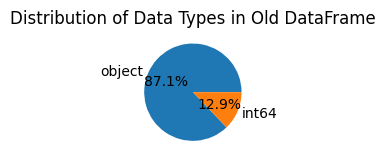

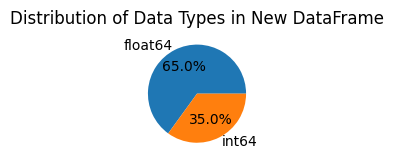

In [11]:
dtype_counts = df.dtypes.value_counts()
#plot as pie chart
plt.figure(figsize=(2, 2))
plt.pie(dtype_counts, labels=dtype_counts.index.astype(str), autopct='%1.1f%%')
plt.title('Distribution of Data Types in Old DataFrame')
plt.tight_layout()
plt.show()

dtype_counts = merged_df.dtypes.value_counts()
#plot as pie chart
plt.figure(figsize=(1.75, 1.75))
plt.pie(dtype_counts, labels=dtype_counts.index.astype(str), autopct='%1.1f%%')
plt.title('Distribution of Data Types in New DataFrame')
plt.tight_layout()
plt.show()

<br>Following is an overview table comprising of dataframe information before and after data cleaning.

In [12]:
summary_data = {"Metric": ["Rows", "Columns", "Data Types", "Size"],
                "Before Cleaning": [40000, 5972, "int64(410), object(5562)", "485 MB"],
                "After Cleaning": [40000, 343, "float64(223), int64(120)", "104.7 MB"] }
summary_merged_df = pd.DataFrame(summary_data)
summary_merged_df

,Metric,Before Cleaning,After Cleaning
0,Rows,40000,40000
1,Columns,5972,343
2,Data Types,"int64(410), object(5562)","float64(223), int64(120)"
3,Size,485 MB,104.7 MB


##### Analysis strategy
Some data cleaning tasks are intentionally postponed until after Exploratory Data Analysis (EDA), including:

- Context-specific outlier treatment
- Feature transformations based on distribution insights
- Feature binning and re-categorization
- Target leak detection and feature dropping accordingly

These will be informed by insights uncovered during EDA.

## Exploratory Data Analysis (EDA) and Feature Engineering

#### Step-by-Step Process and Workflow
The process starts with some initial feature engineering, mainly focused on creating count features and scores based on groups of columns related to birth-specific data. These columns have indexes in their names, which will be cleaned by removing the index part and then mapping them to more readable names using the provided .MAP file. This helps make the dataset easier to work with and understand.

Once that's done, we move into Exploratory Data Analysis (EDA). First, we’ll look at the number of non-null values in each column to spot any features with too much missing data. We’ll also generate a correlation matrix to find and drop columns that are either unrelated to the target or too closely correlated with other features. This step also helps us decide how to fill in missing values and fix any weird or incorrect entries.

After that, we’ll recalculate the correlation matrix on the cleaned data to confirm that the remaining features are more useful. We’ll then plot histograms to check for outliers and figure out whether we need to apply scaling or standardization to the numerical data.

Finally, we’ll review the data types, especially for categorical variables that are currently stored as integers, and fix them so they’re correctly recognized as categories.

#### Initial Feature Engineering
##### 1. Creating count features and custom scores using birth-specific indexed columns:
*Kindly refer to .MAP file to know the description of selected columns*

Prediction of cesarean section is highly relative to number of times the woman has had c-section before.

In [13]:
#TARGET COLUMN rename
merged_df.rename(columns = {"M17$1" : "deliv_by_c_section_TARGET"}, inplace=True)

past_deliv_by_c_section_cols = []
pattern = r'^(M17)+\$+[2-9]$'
for c in merged_df.columns.tolist():
    if re.match(pattern, c):
        past_deliv_by_c_section_cols.append(c)
merged_df['past_c_section_count'] = (merged_df[past_deliv_by_c_section_cols] == 1).sum(axis=1)
merged_df['ever_had_c_section_before'] = (merged_df['past_c_section_count'] > 0).astype(int)

<br>Macrosomia means weight/size of the birthed child is larger than normal. According to Indian standards, macrosomia is considered as higher then 3.5 KG, and less than 2.5 KG is considered lower than normal which can have negative correlation with need of surgical intervention during delivery.

In [14]:
child_weight_cols = []
pattern = r'^(M19)+\$+[2-9]$'
for c in merged_df.columns.tolist():
    if re.match(pattern, c):
        child_weight_cols.append(c)
merged_df.loc[:, child_weight_cols] = merged_df[child_weight_cols].where(merged_df[child_weight_cols] < 9996, np.nan)
merged_df['macrosomia_count'] = merged_df[child_weight_cols].apply(lambda r: sum(w >= 3500 for w in r if pd.notna(w)), axis=1)
merged_df['low_birthweight_count'] = merged_df[child_weight_cols].apply(lambda r: sum(w < 2500 for w in r if pd.notna(w)), axis=1)

<br>Death of child within 28 days of birth date indicates to pregnancy complications face during last birth which is very important in predicting whether any future pregnancies will face complications or not.

In [15]:
child_deaths_cols = []
pattern = r'^(B6)+\$+[2-9]$'
for c in merged_df.columns.tolist():
    if re.match(pattern, c):
        child_deaths_cols.append(c)
merged_df['past_child_deaths_within_28_days'] = merged_df[child_deaths_cols].apply(lambda r: sum(x < 129 for x in r if pd.notna(x)), axis=1)

<br>Created the care_advice_score by summing binary indicators across five columns. The type and amount of care advice received, and the precautionary steps taken during care, offer insight into the level of medical attention or awareness around a pregnancy.

In [16]:
care_adv_cols = ['S440A$1', 'S440B$1', 'S440C$1', 'S440D$1', 'S440E$1']
merged_df['care_advice_score'] = merged_df[care_adv_cols].apply(lambda r: sum(x == 1 for x in r if pd.notna(x)), axis=1)

<br>Preventive actions taken during pregnancy are key indicators of early risk detection or proactive management. A higher score here could reflect either a well-functioning care system or recognition of an elevated risk profile, both of which are relevant to modeling future outcomes.

In [17]:
precautionary_care_cols = ['S432$1', 'S436$1', 'S437$1']
merged_df['precautionary_care_score'] = merged_df[precautionary_care_cols].apply(lambda r: sum(x==1 for x in r if pd.notna(x)), axis=1)

<br>Complications in past deliveries are among the most reliable predictors of risk in future pregnancies. A higher score signals a history of adverse events, which is essential for modeling recurrence probability and planning interventions.

In [18]:
preg_complication_cols = ['S420A$1', 'S420B$1', 'S420C$1', 'S420D$1', 'S420E$1', 'S434$1', 'S435$1']
merged_df['preg_complication_score'] = merged_df[preg_complication_cols].apply(lambda r: sum(x==1 for x in r if pd.notna(x)), axis=1)

prev_delivery_complication_cols = ['S441$1', 'S442$1', 'S443$1']
merged_df['prev_delivery_complication_score'] = merged_df[prev_delivery_complication_cols].apply(lambda r: sum(x==1 for x in r if pd.notna(x)), axis=1)

##### 2. Cleaning column names by removing index parts and remapping them using the .MAP file.
Resulting in a more readable and structured DataFrame.

In [19]:
pattern = r'^(?:M1|M2A|M3A|M3H|M10|M13|M14|M15|M43|M45|S414|S419E)\$1$'
new_cols = []
for c in merged_df.columns:
    if re.match(pattern, c):
        new_cols.append(c.replace('$1', ''))
    else:
        new_cols.append(c)
merged_df.columns = new_cols

merged_df.rename(columns = {"B11$1" : "last_preg_interval"}, inplace=True) #renaming to last pregnancy interval (in months) [risky for < 24 months]

#renaming columns suggesting potentially problematic drugs for the fetus taken by mother 
merged_df.rename(columns = {"M60$1" : "intestinal_drugs_during_preg"}, inplace=True) 
merged_df.rename(columns = {"ML1$1" : "times_taken_fansidar_during_preg"}, inplace=True)

In [20]:
#removing $ indexed columns not required anymore
pattern = r'^[A-Z0-9]+\$[0-9]$'
cols = []
for c in merged_df.columns:
    if re.match(pattern, c):
        cols.append(c)
merged_df.drop(columns = cols, inplace=True)

#re-applying mapping for $1 indexed columns that were renamed earlier
filtered_mapping = {k: v for k, v in mapping.items() if k in merged_df.columns}
merged_df.rename(columns=filtered_mapping, inplace=True)

del mapping_df
del mapping

#### Proceeding to Exploratory Data Analysis (EDA)
##### Checking non-null counts to:
- Identify features with high missing values.
- Flag columns that may be dropped or require imputation.

In [21]:
merged_df_summary = pd.DataFrame({
    'column': merged_df.columns,
    'non_null_count': merged_df.notnull().sum().values,
    'dtype': merged_df.dtypes.values
}).sort_values(by='non_null_count', ascending=False)
print(merged_df_summary)

                            column  non_null_count    dtype
0               ultimate_area_unit           40000    int64
1          date_of_interview_(cmc)           40000    int64
2              date_of_birth_(cmc)           40000    int64
3                            state           40000    int64
4       type_of_place_of_residence           40000    int64
..                             ...             ...      ...
50  husband/partner's_education_le            6033  float64
51    husband/partner's_occupation            6033  float64
53  weight_for_domestic_violence_(            4770  float64
54  for_how_long_have_you_been_usi            1848  float64
55  for_how_long_have_you_been_dri             549  float64

[89 rows x 3 columns]


##### Generating correlation matrix to:
- Detect features unrelated to the target.
- Identify and remove highly correlated (multicollinear) features.
- Guide filling of missing values and corrections of problematic entries.

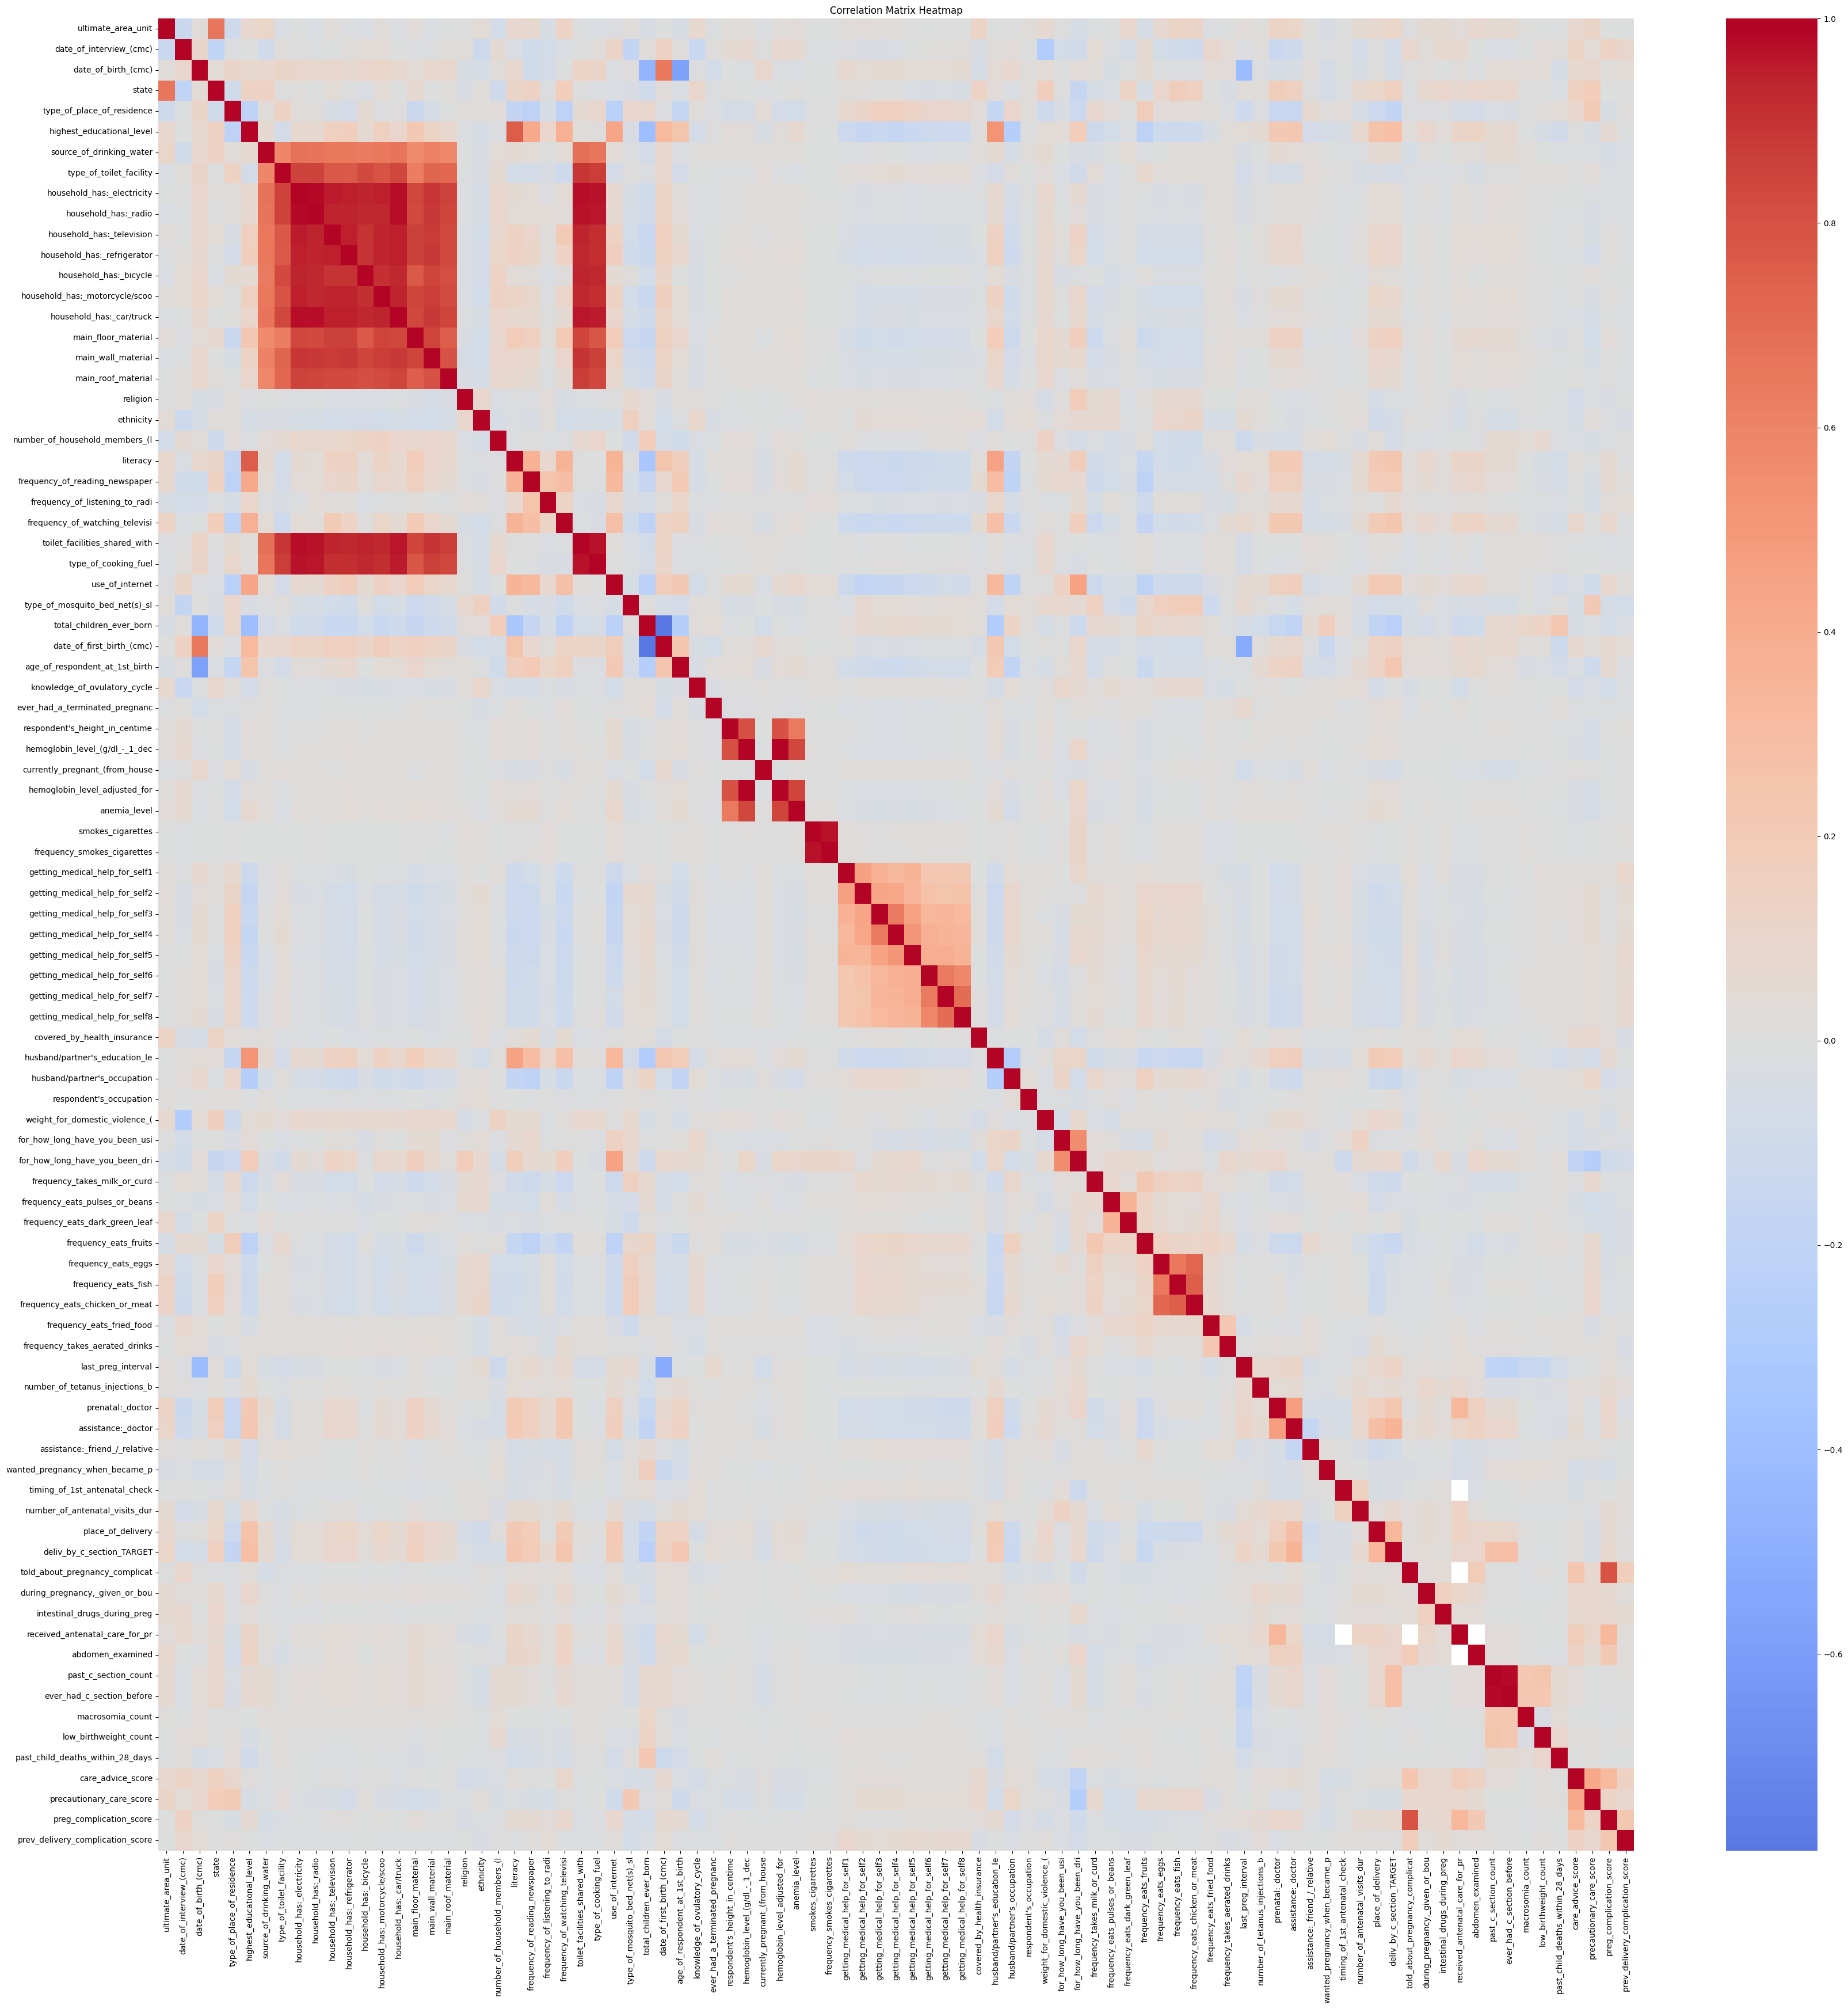

In [22]:
plt.figure(figsize=(35, 35))
sns.heatmap(merged_df.corr(), cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

##### 1. Dropping columns
These columns are having very high null counts making them not feasible to impute. Correlation matrix has also been referred to to identify highly-correlated features.

In [23]:
cols_to_drop = ['for_how_long_have_you_been_dri', 
                'for_how_long_have_you_been_usi', 
                'weight_for_domestic_violence_(', 
                'use_of_internet', 
                'main_floor_material', 
                'main_wall_material', 
                'main_roof_material', 
                'told_about_pregnancy_complicat', 
                'hemoglobin_level_(g/dl_-_1_dec', 
                'currently_pregnant_(from_house', 
                'hemoglobin_level_adjusted_for', 
                'type_of_cooking_fuel', 
                'date_of_interview_(cmc)', 
                'date_of_first_birth_(cmc)']
merged_df.drop(columns = cols_to_drop, inplace=True)

##### 2. Filling of missing values and corrections of problematic entries

In [24]:
merged_df["husband/partner's_occupation"] = merged_df["husband/partner's_occupation"].fillna(98) #98 meaning 'Don't Know'
merged_df["husband/partner's_education_le"] = merged_df["husband/partner's_education_le"].fillna(8) #8 meaning 'Don't Know'
merged_df["respondent's_occupation"] = merged_df["respondent's_occupation"].fillna(99998) #99998 meaning 'Don't Know'
merged_df["last_preg_interval"] = merged_df["last_preg_interval"].fillna(-1) #-1 meaning 'Inconsistent'
merged_df["abdomen_examined"] = merged_df["abdomen_examined"].fillna(0) #0 meaning 'No'
merged_df["respondent's_height_in_centime"] = merged_df["respondent's_height_in_centime"].fillna(merged_df["respondent's_height_in_centime"].mean())
merged_df['timing_of_1st_antenatal_check'] = merged_df['timing_of_1st_antenatal_check'].fillna(-1) #-1 meaning 'No visits'
merged_df['religion'] = merged_df['religion'].replace(96, -1)

##### 3. More Feature Engineering: Creating count features and custom scores using birth-specific indexed columns
Household standards related columns have been merged to one 'household_standards_score' to further reduce number of features and control impact on target variable.

In [25]:
#Inverting the column entries for column below not get a misleading household score as per mapping
merged_df['toilet_facilities_shared_with'] = merged_df['toilet_facilities_shared_with'].apply(lambda x: 1 if x == 0 else 0 if x == 1 else x)

household_cols = [
    'type_of_place_of_residence',
    'household_has:_electricity',
    'household_has:_radio',
    'household_has:_television',
    'household_has:_refrigerator',
    'household_has:_bicycle',
    'household_has:_motorcycle/scoo',
    'household_has:_car/truck',
    'toilet_facilities_shared_with'
]

merged_df['housing_standards_score'] = merged_df[household_cols].apply(lambda r: sum(x == 1 for x in r if pd.notna(x)), axis=1)
merged_df.drop(columns = household_cols, inplace=True)

<br>Similar approach taken with medical help for self; this score represents how capable is the woman in getting medical help for self.

In [26]:
pattern = r'^(getting_medical_help_for_self)'
cols = []
for c in merged_df.columns:
    if re.match(pattern, c):
        cols.append(c)
merged_df['medical_help_self'] = merged_df[cols].apply(lambda r: sum((x==0 or x==2) for x in r if pd.notna(x)), axis=1)
merged_df.drop(columns = cols, inplace = True)

<br>Media exposure of the woman represents how informed she is with the latest technology and products in the market, as well as awareness of cultures around the world.

In [27]:
cols = ['frequency_of_reading_newspaper', 'frequency_of_listening_to_radi', 'frequency_of_watching_televisi']
merged_df[cols] = merged_df[cols].replace(9, 0)
merged_df['media_exposure_score'] = merged_df[cols].sum(axis=1)
merged_df.drop(columns = cols, inplace = True)

<br>Individual dietary and lifestyle habits are strong indicators of a person’s overall health status, especially during pregnancy. However, analyzing each food or behavior-related variable in isolation can dilute their collective impact and complicate model interpretation. By converting qualitative responses into scaled numeric values and combining them, we obtain a composite metric that reflects overall nutritional quality and health risk associated with daily habits. This score simplifies modeling while preserving the predictive signal from the original input variables.

In [28]:
def healthy_score(val):
    return {1: 3, 2: 2, 3: 1, 0: 0}.get(val, np.nan)

def unhealthy_score(val):
    return {1: 0, 2: 1, 3: 2, 0: 3}.get(val, np.nan)

healthy_cols = [
    'frequency_takes_milk_or_curd',
    'frequency_eats_pulses_or_beans',
    'frequency_eats_dark_green_leaf',
    'frequency_eats_fruits',
    'frequency_eats_eggs',
    'frequency_eats_fish',
    'frequency_eats_chicken_or_meat'
]
unhealthy_cols = [
    'frequency_eats_fried_food',
    'frequency_takes_aerated_drinks',
    'frequency_smokes_cigarettes'
]

for col in healthy_cols:
    merged_df[col + '_score'] = merged_df[col].apply(healthy_score)

for col in unhealthy_cols:
    merged_df[col + '_score'] = merged_df[col].apply(unhealthy_score)

score_cols = [col + '_score' for col in healthy_cols + unhealthy_cols]
merged_df['diet_lifestyle_score'] = merged_df[score_cols].sum(axis=1, skipna=True)
merged_df.drop(columns = healthy_cols + unhealthy_cols + score_cols, inplace=True)

After initial cleanup:
##### Recalculating correlation matrix:
- To validate that retained features are more relevant and less redundant.

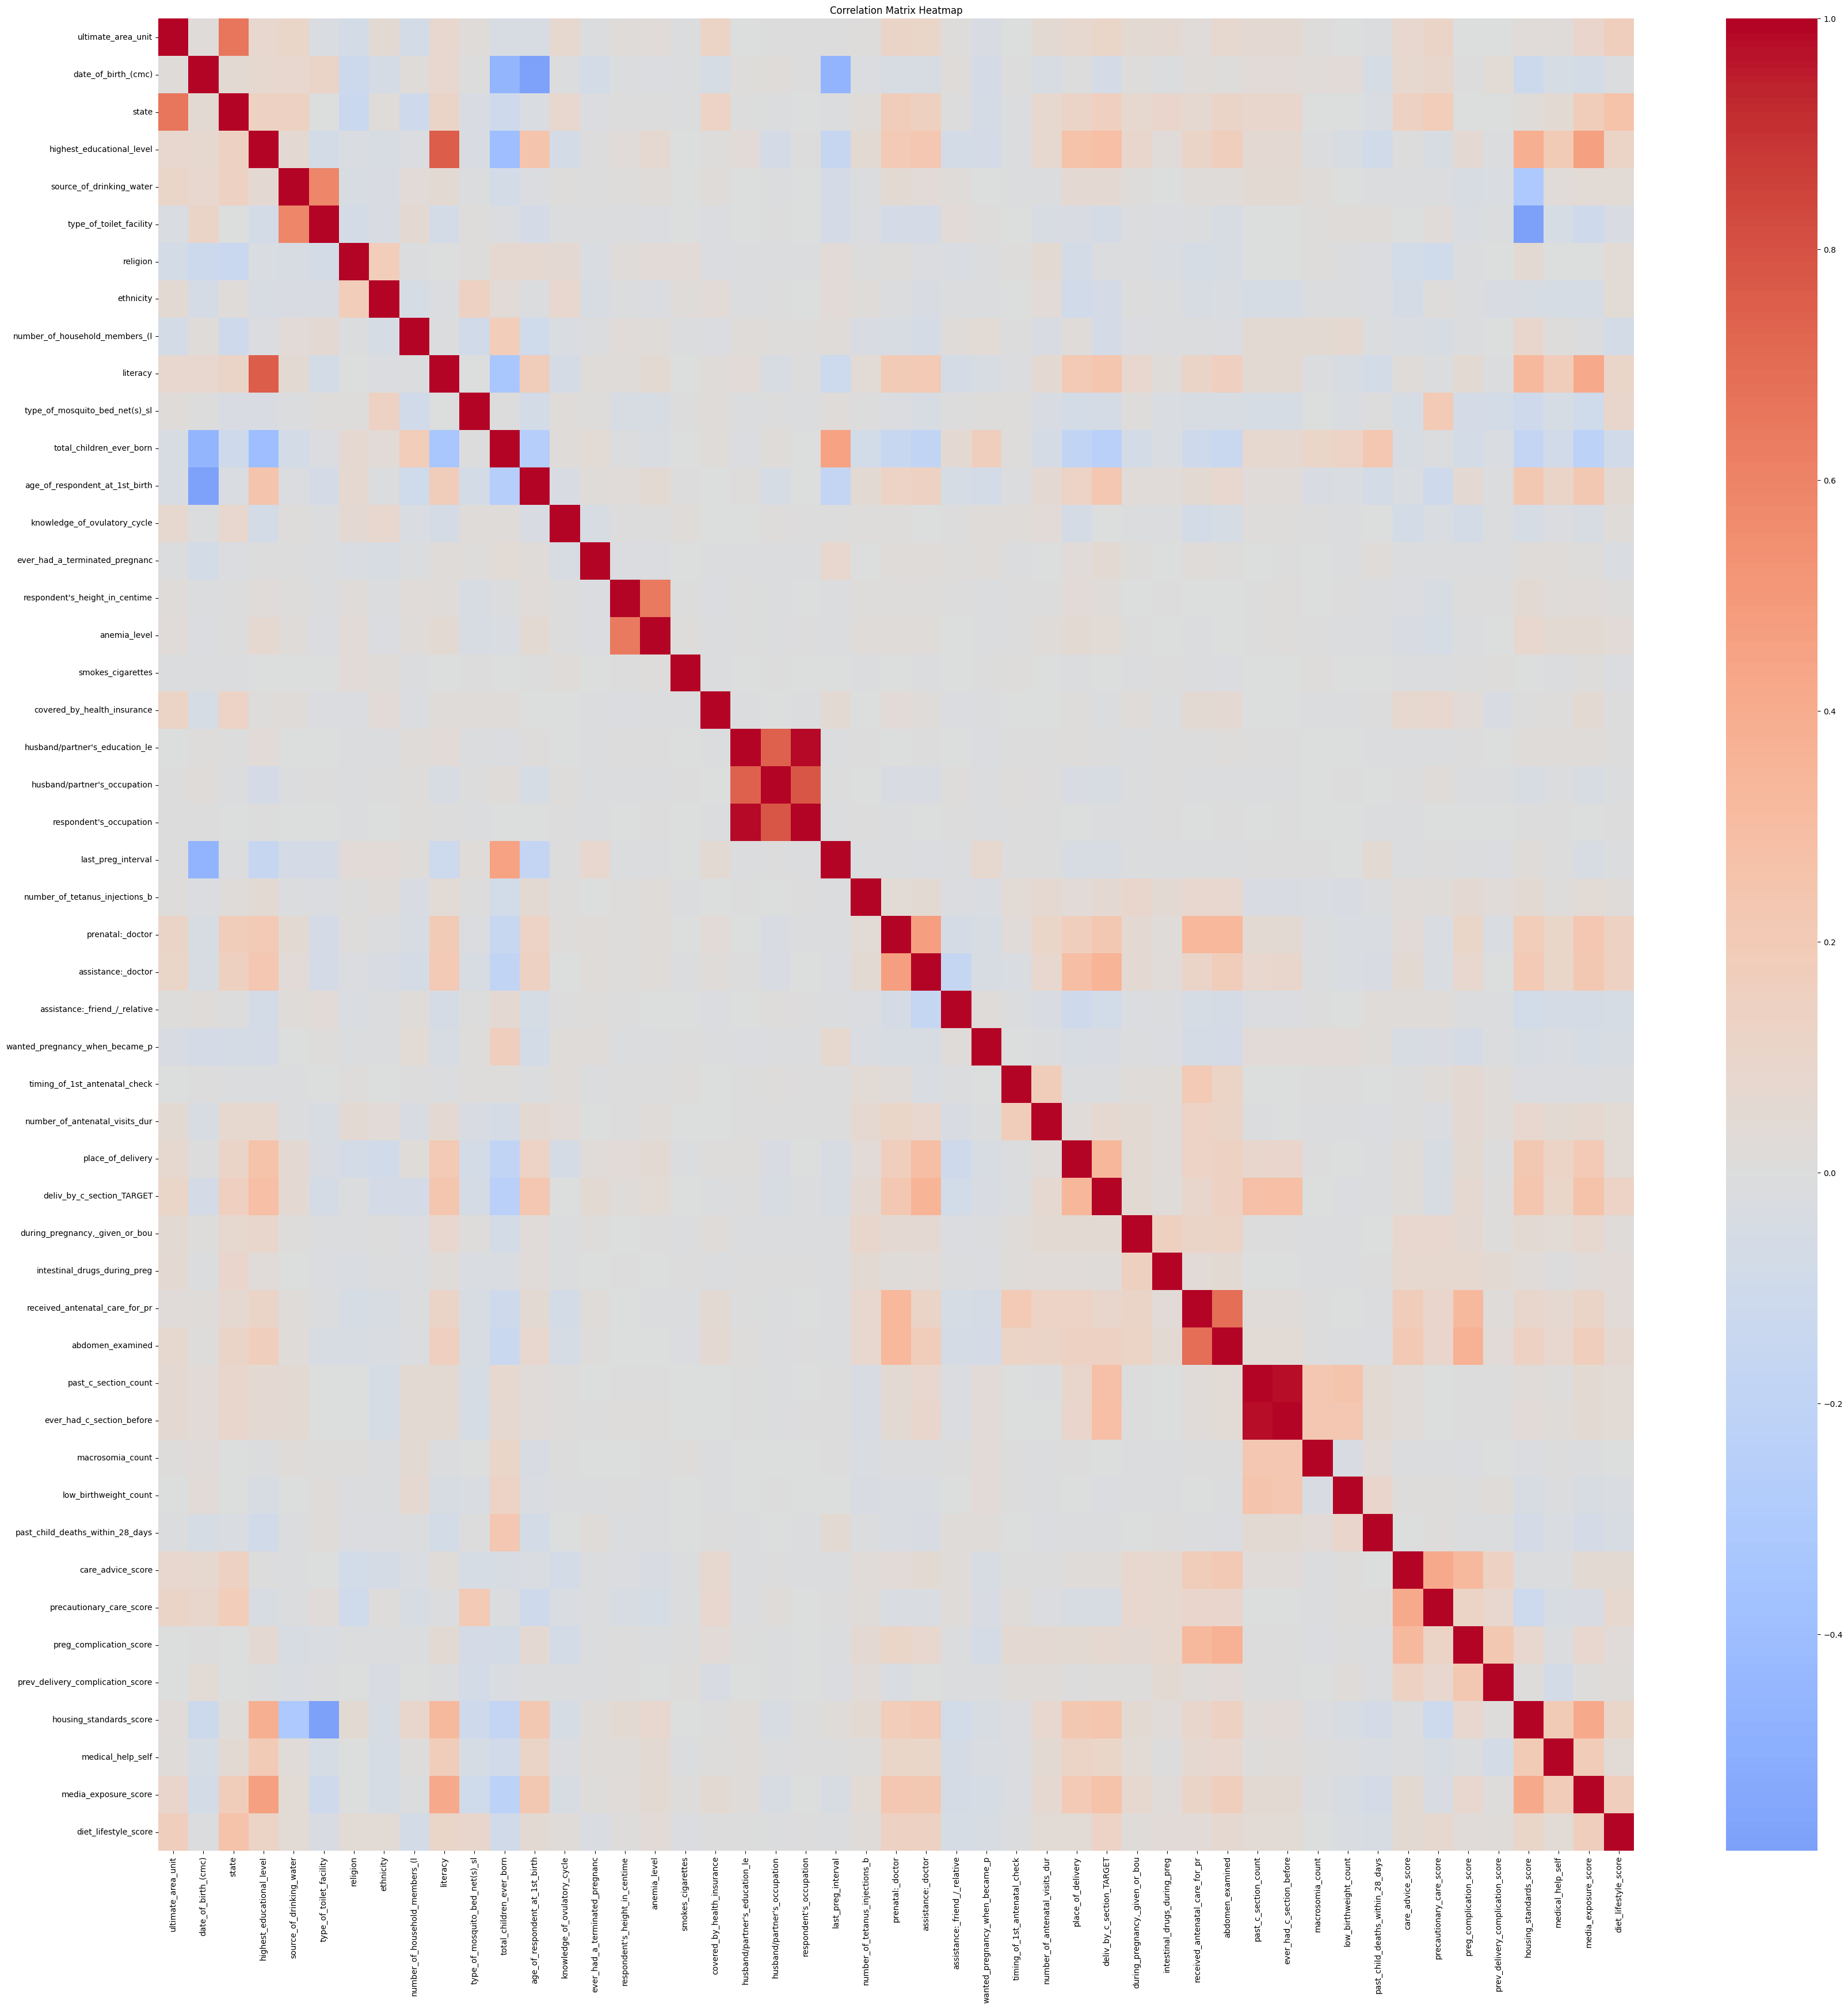

In [29]:
plt.figure(figsize=(35, 35))  # Adjust depending on your display capabilities
sns.heatmap(merged_df.corr(), cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

##### Plotting histograms for all features to:
- Detect potential outliers.
- Guide decisions on scaling or standardization methods.

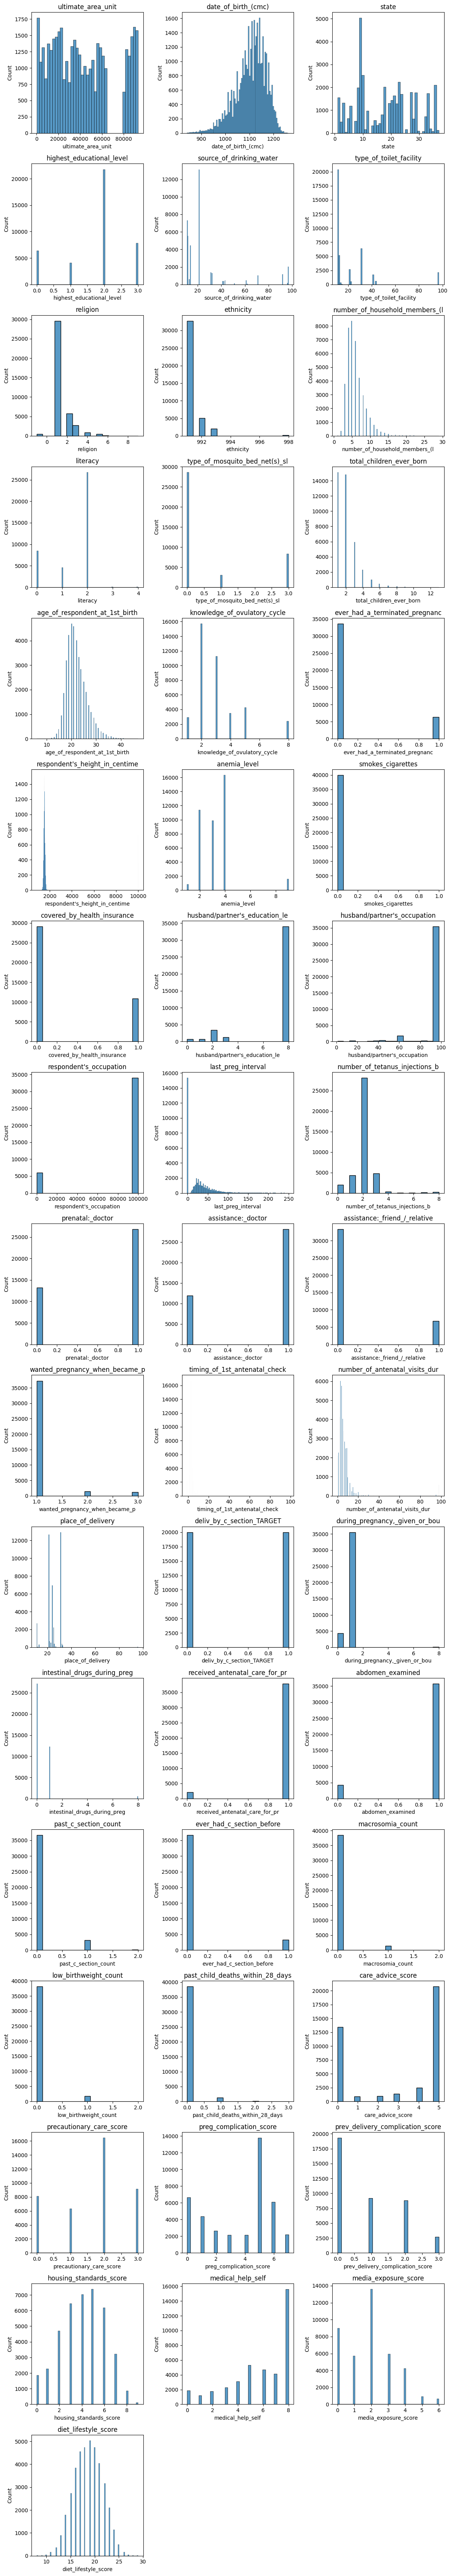

In [30]:
plots_per_row = 3
total_plots = len(merged_df.columns)
rows = (total_plots // plots_per_row) + 1

fig, axes = plt.subplots(rows, plots_per_row, figsize=(plots_per_row * 4, rows * 4))
axes = axes.flatten()

for idx, c in enumerate(merged_df.columns):
    sns.histplot(x=merged_df[c], ax=axes[idx])
    axes[idx].set_title(c)

#hide any unused subplots
for idx in range(total_plots, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

##### 4. Removing columns with non unique values and mostly "missing" or "dont know" category

In [31]:
#removal due to no unique value
merged_df.drop(columns = ['smokes_cigarettes'], inplace=True)

#removal due to mostly being "missing" or "don't know" category
cols = ["respondent's_occupation", "husband/partner's_education_le", "husband/partner's_occupation"]
merged_df.drop(columns = cols, inplace=True)

merged_df['number_of_antenatal_visits_dur'] = merged_df['number_of_antenatal_visits_dur'].replace(98, 0)
merged_df['place_of_delivery'] = merged_df['place_of_delivery'].replace(96, 34)
merged_df['timing_of_1st_antenatal_check'] = merged_df['timing_of_1st_antenatal_check'].replace(98, -1)

merged_df['ethnicity'] = merged_df['ethnicity'] - 990
merged_df['ethnicity'] = merged_df['ethnicity'].replace(8, 0)

##### 5. Outlier detection and removal using IQR method
The IQR (Interquartile Range) method identifies outliers by defining boundaries outside which data points are considered unusual. These boundaries are established by calculating the lower and upper fences, which are 1.5 times the IQR below the first quartile (Q1) and above the third quartile (Q3), respectively.

In [32]:
#defining function to remove outliers using IQR method explained above
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

#selection of columns guided by histograms
columns_to_clean = ['ultimate_area_unit', 
                    'date_of_birth_(cmc)', 
                    'age_of_respondent_at_1st_birth', 
                    "respondent's_height_in_centime", 
                    'last_preg_interval']

df_cleaned = remove_outliers_iqr(merged_df, columns_to_clean)

##### 6. Standardise features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:<br>
        $ z = (x - u) / s $
<br>where `u` is the mean of the training samples, and `s` is the standard deviation of the training samples.
*This is later required for models to be working well for training and prediction.*

In [33]:
scaler = StandardScaler()
df_cleaned[columns_to_clean] = scaler.fit_transform(df_cleaned[columns_to_clean])

##### 6. Imputing features
Categorical features that have some values as "don't know" category are being imputed using `housing_standards_score` as the similarity criteria and replacing the "don't know" values with `mode`.

In [34]:
#value 97 represents "unkown" is both of these categorical features
def fill_unknown_with_mode(df, target_col, group_col):
    df[target_col] = df.groupby(group_col)[target_col].transform(lambda x: x.replace(97, x[x != 97].mode()[0] if not x[x != 97].mode().empty else 97))
    return df

# #Filling using 'housing_standards_score' as the similarity criterion
df_cleaned = fill_unknown_with_mode(df_cleaned, 'source_of_drinking_water', 'housing_standards_score')
df_cleaned = fill_unknown_with_mode(df_cleaned, 'type_of_toilet_facility', 'housing_standards_score')

#value 96 represents "Other" which is changed to 45 for balancing the data 
df_cleaned['source_of_drinking_water'] = df_cleaned['source_of_drinking_water'].replace(96, 45)
df_cleaned['type_of_toilet_facility'] = df_cleaned['type_of_toilet_facility'].replace(96, 45)

In [35]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36199 entries, 0 to 39999
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ultimate_area_unit                36199 non-null  float64
 1   date_of_birth_(cmc)               36199 non-null  float64
 2   state                             36199 non-null  int64  
 3   highest_educational_level         36199 non-null  int64  
 4   source_of_drinking_water          36199 non-null  int64  
 5   type_of_toilet_facility           36199 non-null  int64  
 6   religion                          36199 non-null  int64  
 7   ethnicity                         36199 non-null  int64  
 8   number_of_household_members_(l    36199 non-null  int64  
 9   literacy                          36199 non-null  int64  
 10  type_of_mosquito_bed_net(s)_sl    36199 non-null  int64  
 11  total_children_ever_born          36199 non-null  int64  
 12  age_of_re

##### 7. Fixing data types
Review columns with incorrect dtypes (categorical data stored as integers). Convert these columns to appropriate types (category or object).
This immensly reduces the byte-size of the dataframe.

In [36]:
categorical_columns = [
    'state',
    'highest_educational_level',
    'source_of_drinking_water',
    'type_of_toilet_facility',
    'religion',
    'ethnicity',
    'literacy',
    'type_of_mosquito_bed_net(s)_sl',
    'knowledge_of_ovulatory_cycle',
    'ever_had_a_terminated_pregnanc',
    'anemia_level',
    'covered_by_health_insurance',
    'number_of_tetanus_injections_b',
    'prenatal:_doctor',
    'assistance:_doctor',
    'assistance:_friend_/_relative',
    'wanted_pregnancy_when_became_p',
    'place_of_delivery',
    'deliv_by_c_section_TARGET',
    'during_pregnancy,_given_or_bou',
    'intestinal_drugs_during_preg',
    'received_antenatal_care_for_pr',
    'ever_had_c_section_before',
    'medical_help_self'
]

df_cleaned[categorical_columns] = df_cleaned[categorical_columns].astype('category')

### Exploratory Data Analysis (EDA) Summary

The dataframe now comprises of 36199 samples and 45 features. 24 of them are categorical and 21 numeric. The data contains 0 null values.

##### 1. Histograms for comparisons
Following are some histogram comparisons of features before and after outlier removal & scaling:

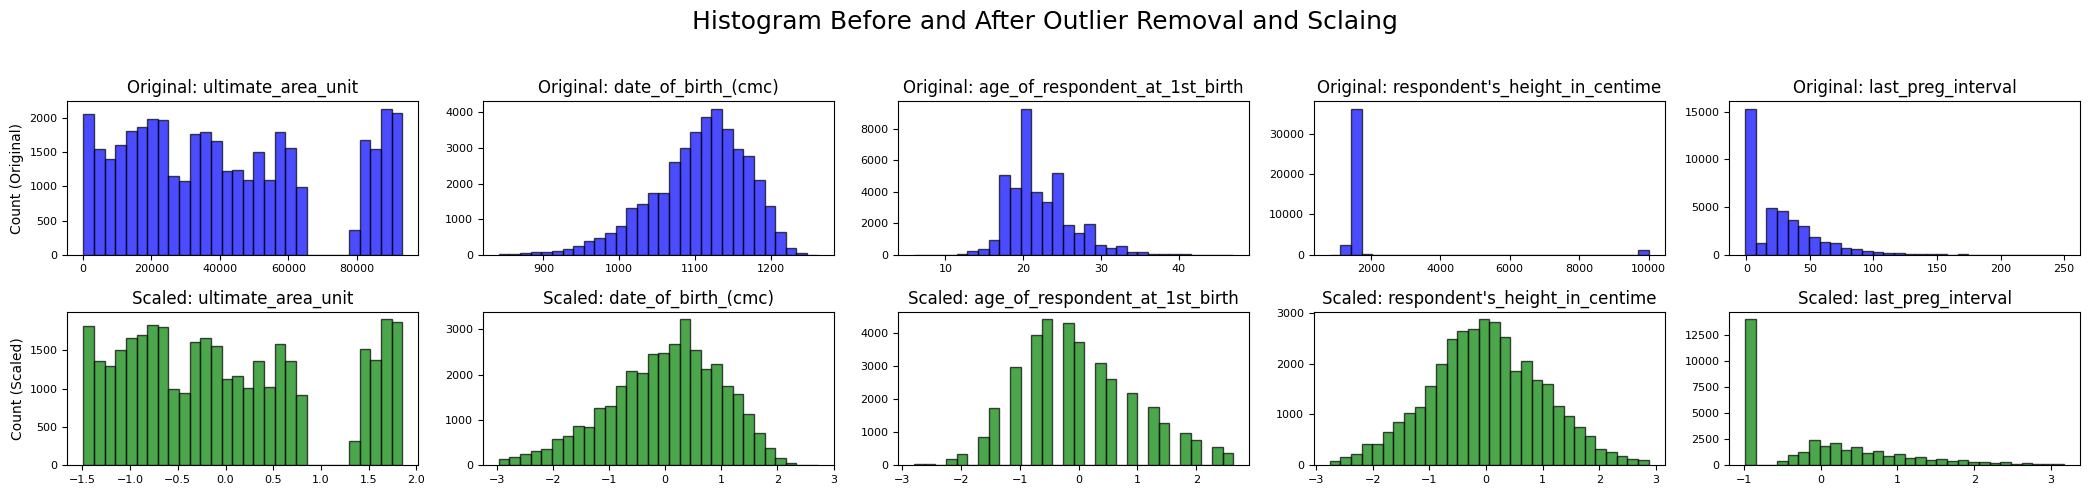

In [37]:
cols = columns_to_clean #these features went through outlier removal and sclaing
l = len(cols)

fig, axes = plt.subplots(2, 5, figsize=(21, 5))
fig.suptitle('Histogram Before and After Outlier Removal and Sclaing', fontsize=18)

for i, col in enumerate(cols):
    #Original (merged_df)
    axes[0, i].hist(merged_df[col], bins=30, alpha=0.7, color='blue', edgecolor='black')
    axes[0, i].set_title(f'Original: {col}')
    axes[0, i].tick_params(labelsize=8)

    #Scaled (df_cleaned)
    axes[1, i].hist(df_cleaned[col], bins=30, alpha=0.7, color='green', edgecolor='black')
    axes[1, i].set_title(f'Scaled: {col}')
    axes[1, i].tick_params(labelsize=8)

axes[0, 0].set_ylabel("Count (Original)", fontsize=10)
axes[1, 0].set_ylabel("Count (Scaled)", fontsize=10)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Following are some histogram comparisons of features before and after imputing:

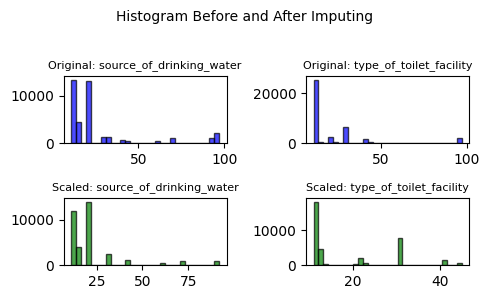

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(5, 3))
fig.suptitle('Histogram Before and After Imputing', fontsize=10)

for i, col in enumerate(['source_of_drinking_water', 'type_of_toilet_facility']):
    #Original
    axes[0, i].hist(merged_df[col], bins=30, alpha=0.7, color='blue', edgecolor='black')
    axes[0, i].set_title(f'Original: {col}', fontsize = 8)
    
    #Imputed
    axes[1, i].hist(df_cleaned[col], bins=30, alpha=0.7, color='green', edgecolor='black')
    axes[1, i].set_title(f'Scaled: {col}', fontsize = 8)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Histogram comparisons before and after preprocessing steps clearly demonstrate the importance of systematic data preparation. `Outlier treatment` improved robustness, `imputation` ensured completeness, and `scaling` enhanced comparability and model-readiness. These steps collectively shaped the dataset into a well-behaved input for machine learning algorithms, with reduced bias, improved numerical stability, and preserved distribution characteristics.

`Before:` 
- Distributions showed long tails and extreme values, skewing the data and obscuring central trends.
- Feature ranges varied widely, making comparisons difficult.
  
`After:`
- Outliers were capped or removed, resulting in more symmetric and interpretable distributions.
- The distributions became more symmetric or followed a more realistic bell-shaped curve.
- Scaling normalized feature ranges, keeping shapes intact while aligning distributions.

##### 2. Correlation Matrix Analysis

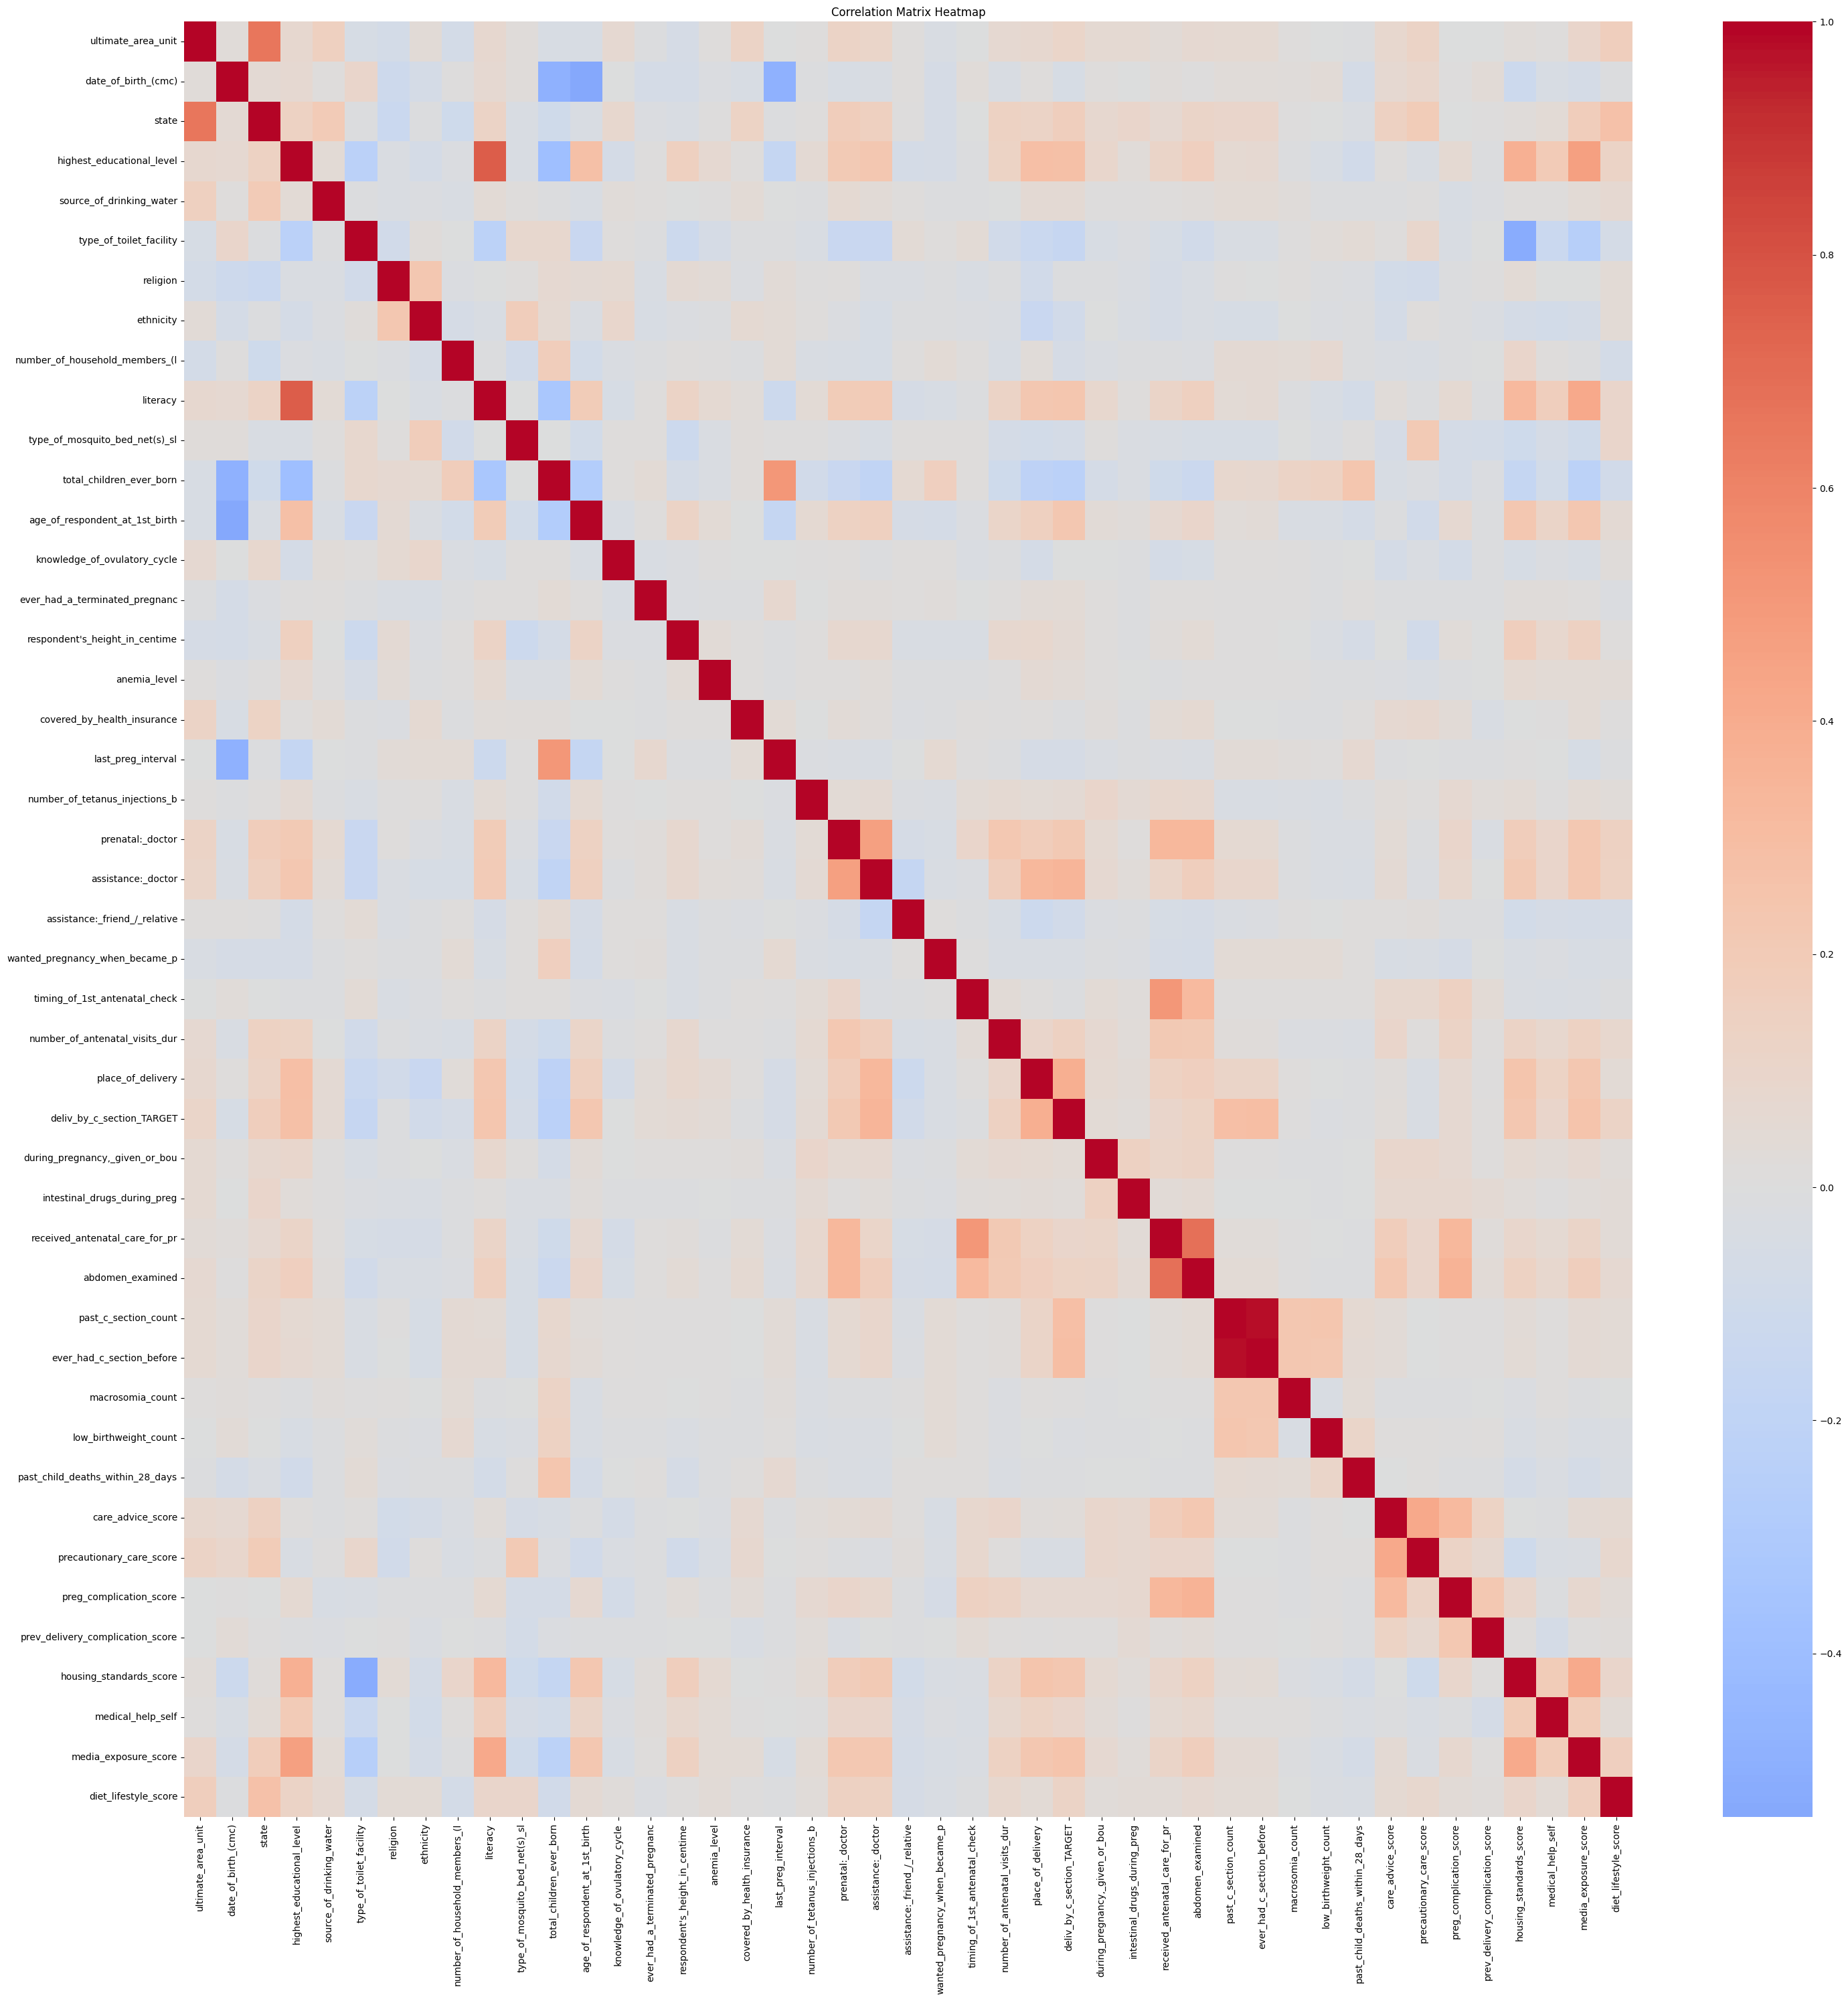

In [39]:
plt.figure(figsize=(30, 30))
sns.heatmap(df_cleaned.corr(), cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

##### Variance Inflation Factors (VIF)
Some columns still denote multi-collinearity which can be further analysed using VIF.

In [40]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_cleaned.drop(columns = ['deliv_by_c_section_TARGET'])
X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data[vif_data['VIF'] > 4]) #VIF more than 5 suggests high possible multi-collinearity

                           feature         VIF
0                            const  161.681059
2              date_of_birth_(cmc)    6.846026
12        total_children_ever_born    4.204719
13  age_of_respondent_at_1st_birth    4.907477
32            past_c_section_count   27.379346
33       ever_had_c_section_before   27.132409


Features `past_c_section_count` and `date_of_birth_(cmc)` will be dropped and VIF will be recalculated to confirm there is no more multicollinearity in the model anymore.

In [41]:
cols = ['past_c_section_count', 'date_of_birth_(cmc)']

X = df_cleaned.drop(columns = ['deliv_by_c_section_TARGET'] + cols)
X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data[vif_data['VIF'] > 4])

  feature         VIF
0   const  153.392097


##### Final correlation matrix

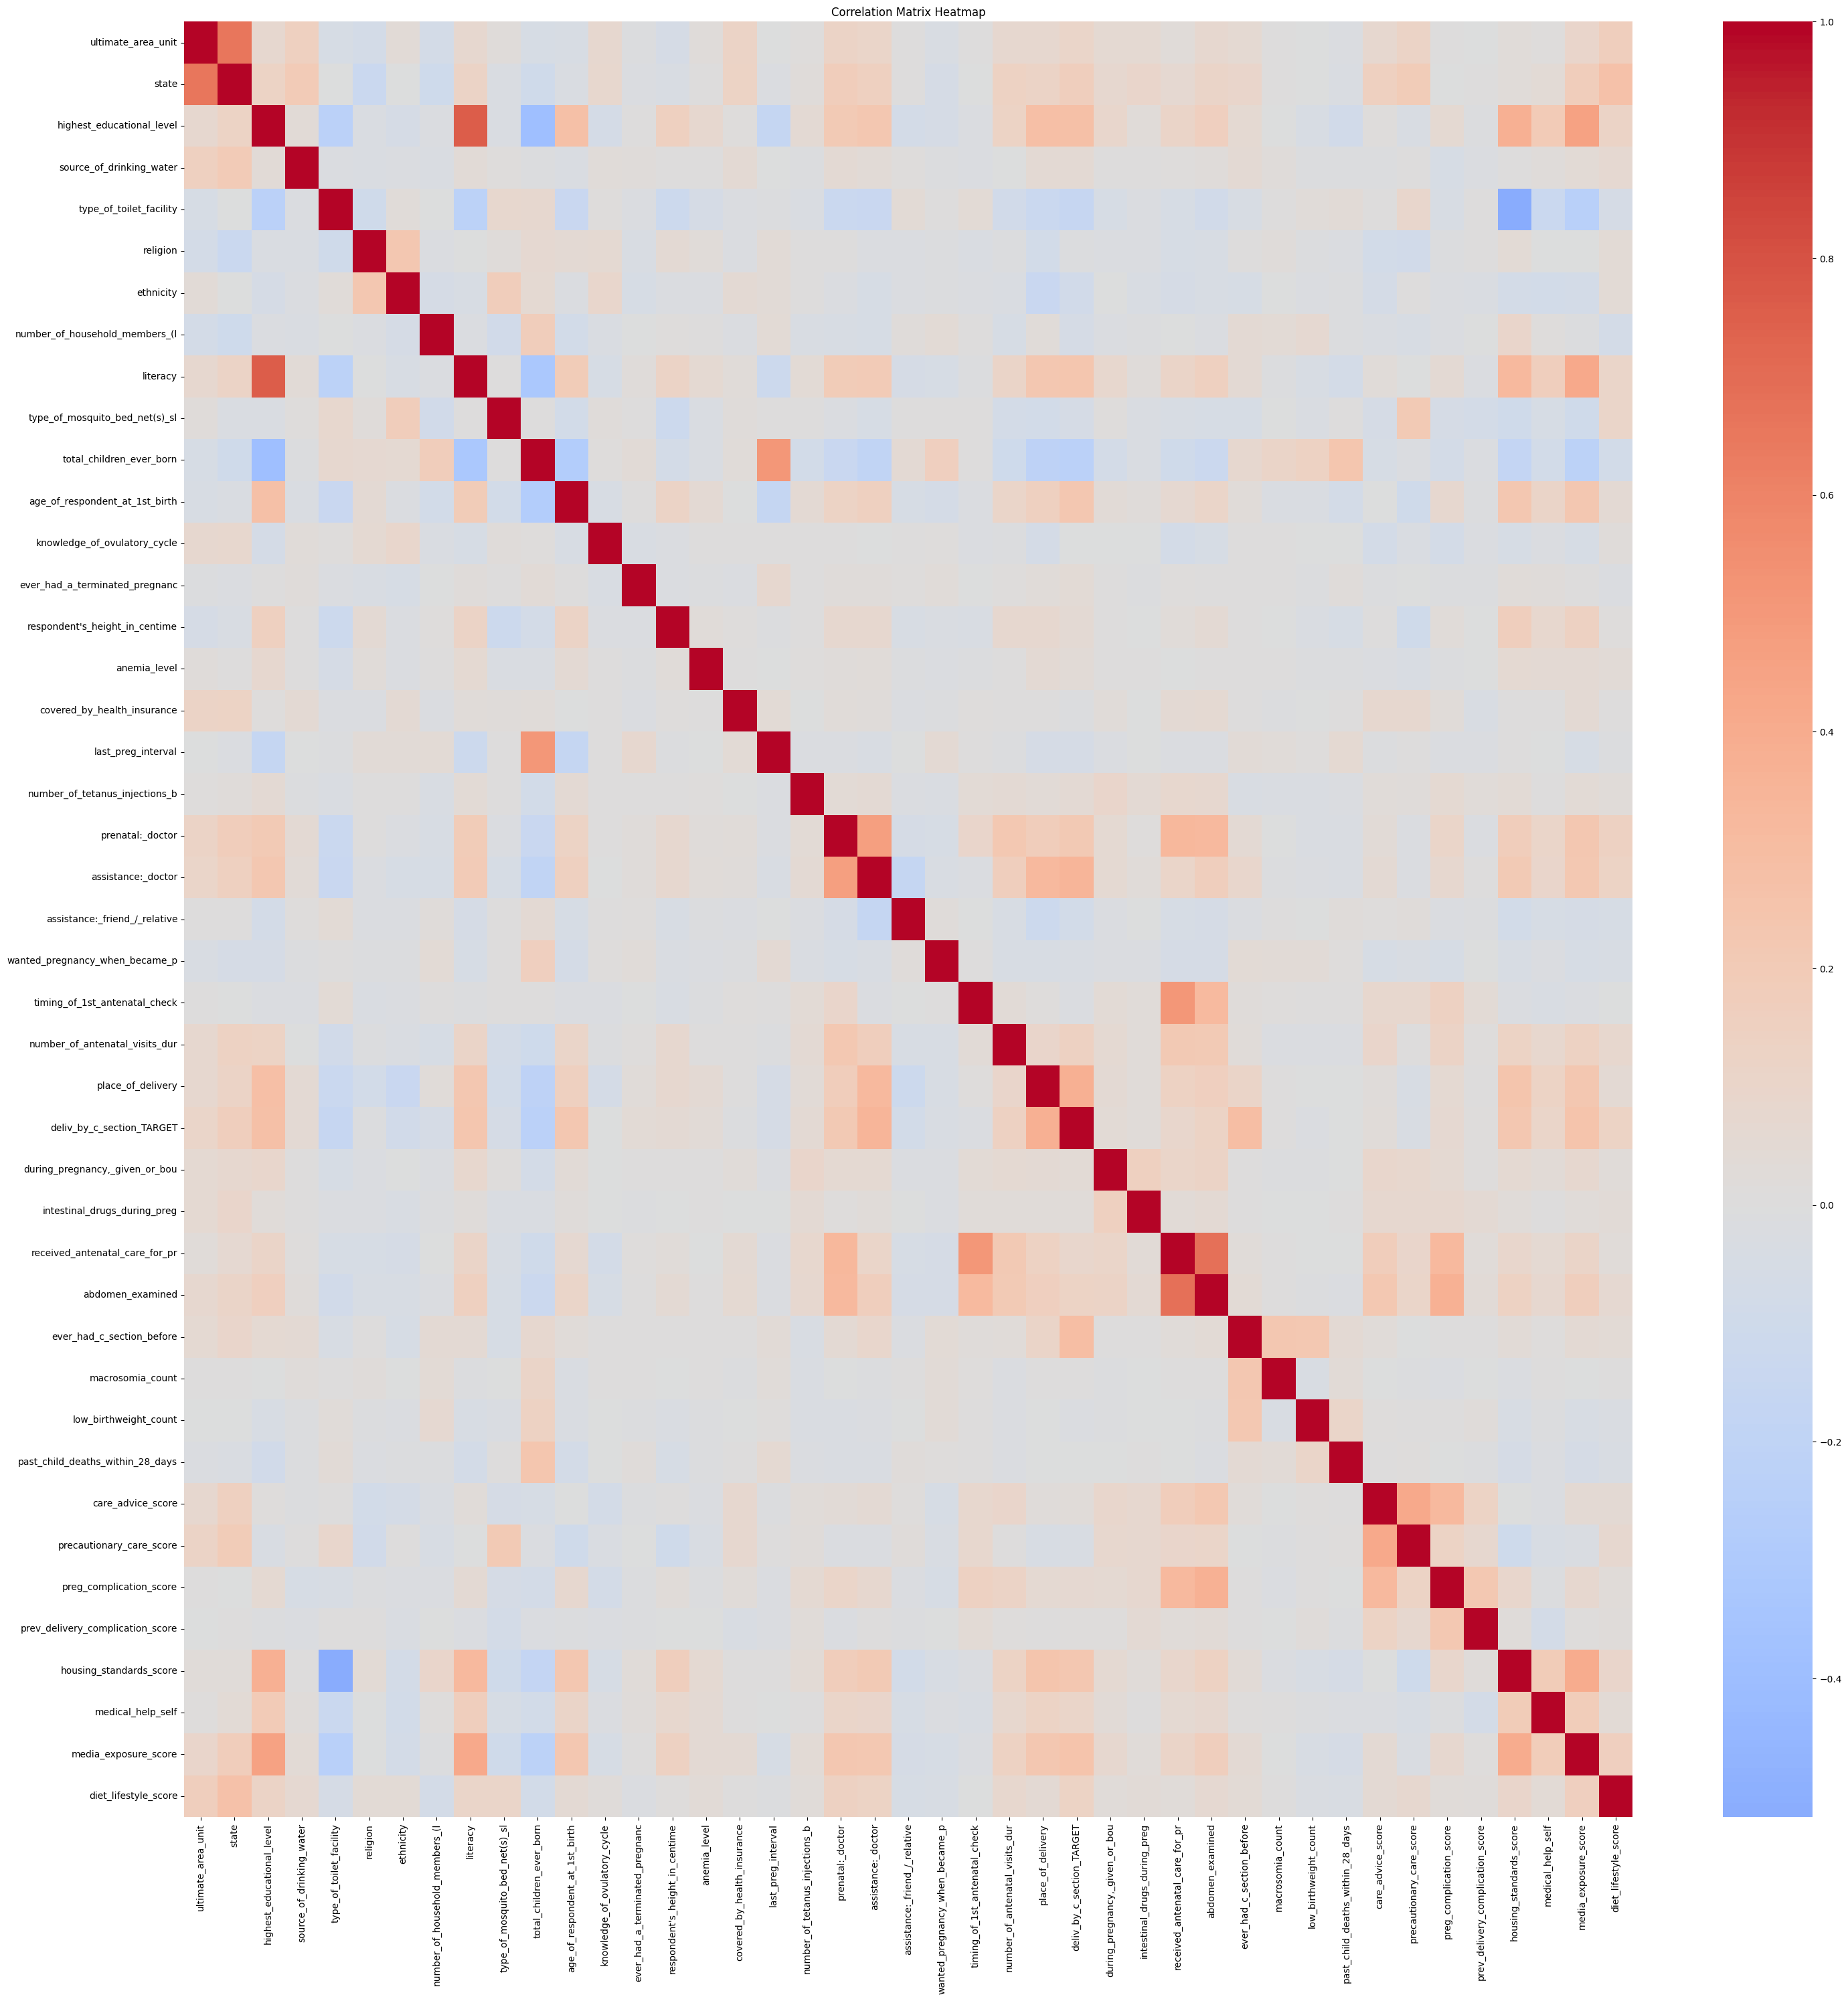

In [42]:
df_cleaned.drop(columns = cols, inplace=True)

plt.figure(figsize=(30, 30))
sns.heatmap(df_cleaned.corr(), cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

The final correlation matrix provides a comprehensive view of the linear relationships among the numerical features post-feature engineering and preprocessing. As observed in the heatmap:
- Most variable pairs exhibit weak to moderate correlations, with values clustering around zero. This suggests that multicollinearity is generally low across the dataset, which is beneficial for many machine learning algorithms.
- Strong positive correlations (dark red) are observed along the diagonal, as expected (self-correlation), and in a few off-diagonal elements—indicating a handful of feature pairs with notable linear dependency. These may represent derived features or logically connected variables.
- Negative correlations (shades of blue) are sparse and generally weak, implying that inverse linear relationships are limited within the feature set.

The correlation of the dataset is well-balanced, with minimal redundancy and a diverse feature set. This prepares the data for modeling, with a reduced risk of instability due to multicollinearity.

#### Conclusion: EDA and Feature Engineering
The exploratory data analysis revealed key insights into the structure, quality, and relationships within the dataset. Data quality was generally acceptable, with minimal missing values and manageable outliers. Appropriate imputation and outlier handling improved the integrity of the dataset without compromising underlying distributions.

Numerical features displayed varied distributions, with some exhibiting skewness and outliers that required treatment. Categorical variables were well-distributed across classes. Correlation analysis highlighted significant relationships between select variables, informing potential feature selection and multicollinearity risks.

Feature scaling was applied to standardize ranges, preparing the dataset for modeling algorithms sensitive to magnitude differences.

**Issues:**
- Columns like `ever_had_c_section_before`, `macrosomia_count`, `last_preg_interval` and some more, which are considered key in predicting surgical intervention during birth are highly skewed in nature even though target variable is very balanced. This is unprecidented and makes creating a highly accurate model difficult.
- Many important antenatal biomarkers used in medical facilities are absent from the data which would have helped in better modelling.
- Most of the features are related but indirectly or with low correlation to the target variable as per domain knowledge.

But in summary, the dataset is now clean, consistent, and well-prepared for downstream predictive modeling or statistical analysis. The EDA phase has effectively guided preprocessing decisions and uncovered valuable patterns that will inform model design and evaluation.

## Models

### 1. Logistic Regression

In [43]:
lr_df = df_cleaned.copy(deep=True) #making a copy of dataframe for logistic regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X = lr_df.drop(columns = 'deliv_by_c_section_TARGET')
y = lr_df.loc[:, 'deliv_by_c_section_TARGET']

#splitting data in 80:20 ratio for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

lr_model = LogisticRegression(max_iter=10000)

#using GridSearchCV to find the best of 4 types of solvers below
param_grid = {'solver': ['liblinear', 'newton-cholesky', 'saga', 'lbfgs']}
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_lr_model = grid_search.best_estimator_

best_lr_model_acc = best_lr_model.score(X_test, y_test) * 100
print(f"Logistic Regression model accuracy: {best_lr_model_acc:.2f}%")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Logistic Regression model accuracy: 75.18%


In [45]:
print("Best parameters:", grid_search.best_params_) #printing the best parameter selected by gridsearchcv

Best parameters: {'solver': 'liblinear'}


In [46]:
from sklearn.metrics import precision_recall_fscore_support as prfs
#storing precision and recall for comparisons
y_pred = best_lr_model.predict(X_test)
lr_prec, lr_recall, _, _ = prfs(y_test, y_pred, average='macro')

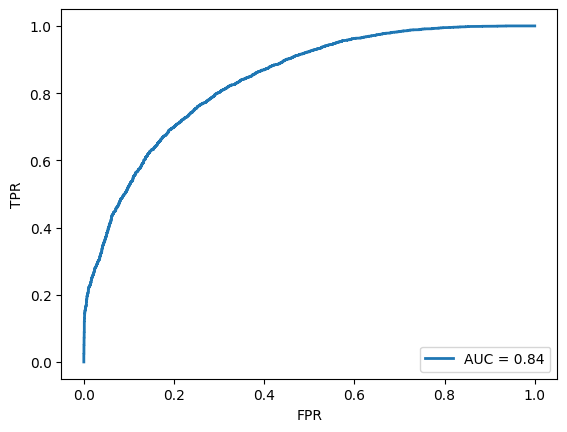

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_scores = best_lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
lr_auc = roc_auc * 100
plt.plot(fpr, tpr, lw = 2, label = f'AUC = {roc_auc:.2f}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right') 
plt.show()

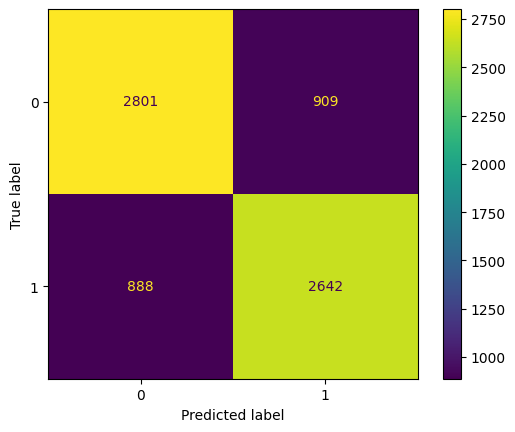

In [48]:
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import ConfusionMatrixDisplay as CMD

conf_matrix = CM((best_lr_model).predict(X_test), y_test)
disp = CMD(confusion_matrix=conf_matrix)
disp.plot()

In [49]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_lr_model, X, y, cv=5)
print("Cross-Validation Accuracy: %.2f%%" % (scores.mean() * 100))

Cross-Validation Accuracy: 75.37%


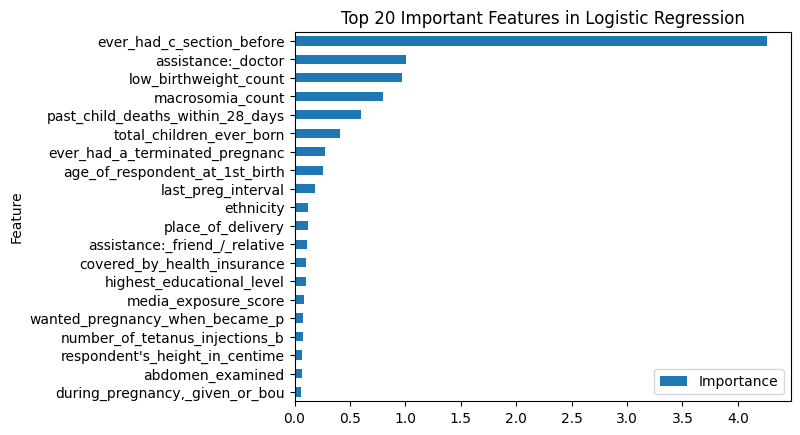

In [50]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': best_lr_model.coef_[0]
})

feature_importance['Importance'] = np.abs(feature_importance['Coefficient'])

#sorting features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
top_features = feature_importance.head(20)
lr_feat_imp = feature_importance.head(10)
top_features.plot(kind='barh', x='Feature', y='Importance')
plt.title('Top 20 Important Features in Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

### 2. K-Nearest Neighbours (KNN)

In [51]:
knn_df = df_cleaned.copy(deep=True)

In [52]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

X = knn_df.drop(columns = 'deliv_by_c_section_TARGET')
y = knn_df.loc[:, 'deliv_by_c_section_TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 20, 50, 100],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_knn_model = grid_search.best_estimator_

best_knn_model_acc = best_knn_model.score(X_test, y_test) * 100
print(f"K-Nearest Neighbours model accuracy: {best_knn_model_acc:.2f}%")

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 50, 'weights': 'distance'}
K-Nearest Neighbours model accuracy: 74.65%


In [53]:
y_pred = best_knn_model.predict(X_test)
knn_prec, knn_recall, _, _ = prfs(y_test, y_pred, average='macro')

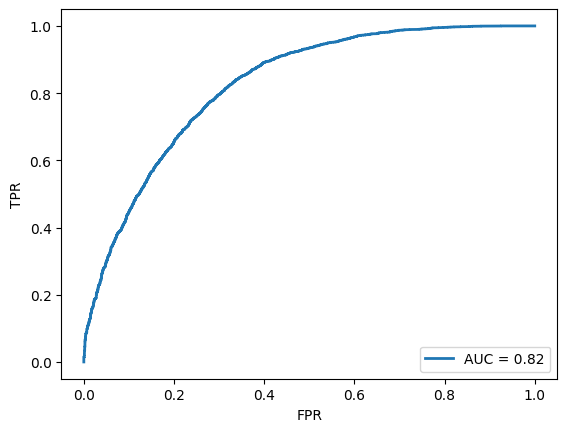

In [54]:
y_scores = best_knn_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
knn_auc = roc_auc * 100
plt.plot(fpr, tpr, lw = 2, label = f'AUC = {roc_auc:.2f}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right') 
plt.show()

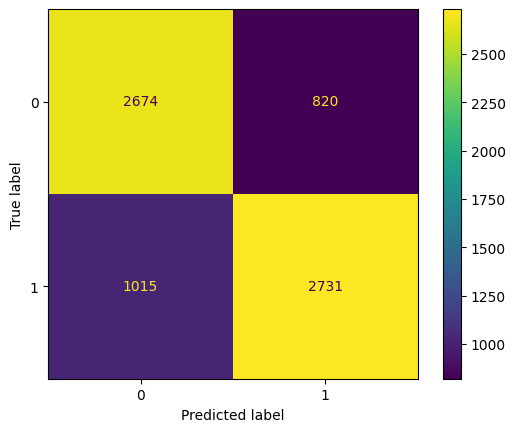

In [55]:
conf_matrix = CM((best_knn_model).predict(X_test), y_test)
disp = CMD(confusion_matrix=conf_matrix)
disp.plot()

### 3. Random Forests

In [56]:
rf_df = df_cleaned.copy(deep=True)

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = rf_df.drop(columns = 'deliv_by_c_section_TARGET')
y = rf_df.loc[:, 'deliv_by_c_section_TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [2, 5, 10],
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42, n_jobs=-1), 
                           param_grid=param_grid,
                           cv=5, 
                           scoring='accuracy', 
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)
best_rf_model_acc = best_rf_model.score(X_test, y_test) * 100

print(f"Random Forest model accuracy: {best_rf_model_acc:.2f}%")
print("Best Parameters:", grid_search.best_params_)

Random Forest model accuracy: 77.53%
Best Parameters: {'max_depth': 10, 'n_estimators': 200}


In [58]:
y_pred = best_rf_model.predict(X_test)
rf_prec, rf_recall, _, _ = prfs(y_test, y_pred, average='macro')

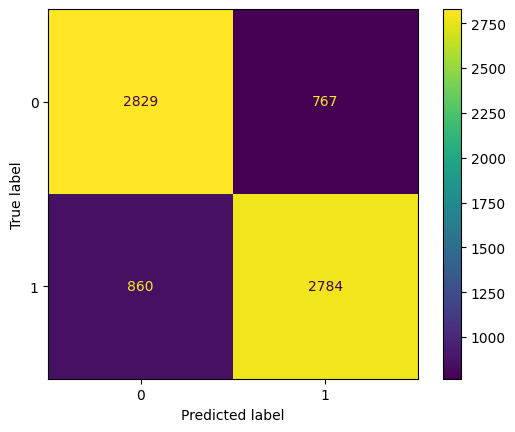

In [59]:
conf_matrix = CM((best_rf_model).predict(X_test), y_test)
disp = CMD(confusion_matrix=conf_matrix)
disp.plot()

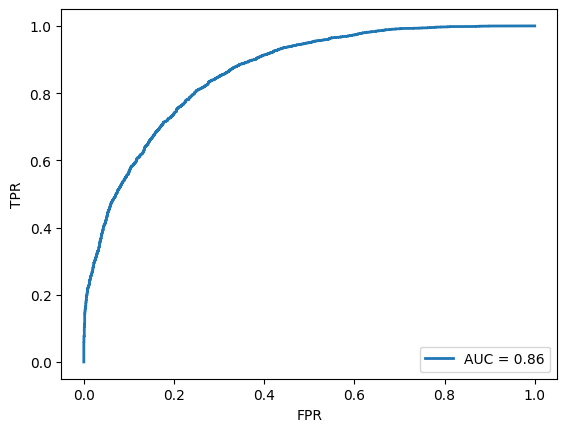

In [60]:
y_scores = best_rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
rf_auc = roc_auc * 100
plt.plot(fpr, tpr, lw = 2, label = f'AUC = {roc_auc:.2f}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right') 
plt.show()

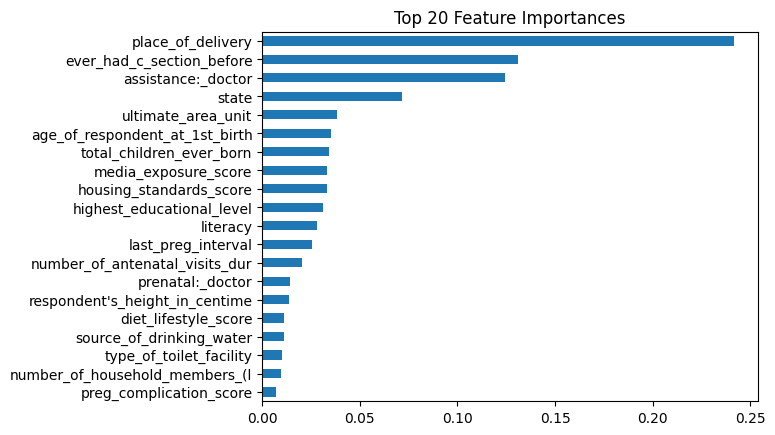

In [61]:
feat_importances = pd.Series(best_rf_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
rf_feat_imp = feat_importances.nlargest(10)
plt.title("Top 20 Feature Importances")
plt.gca().invert_yaxis() 
plt.show()

In [62]:
scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores for each fold:", scores)
print("Mean Accuracy:", scores.mean())

Cross-validation scores for each fold: [0.77582873 0.78121547 0.78480663 0.78162983 0.77496892]
Mean Accuracy: 0.779689916268463


### 4. AdaBoost (Adaptive Boosting)

In [63]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 1],
    'estimator__max_depth': [2, 3]
}

grid_search = GridSearchCV(AdaBoostClassifier(estimator=DecisionTreeClassifier()), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_ada_model = grid_search.best_estimator_
best_ada_model_acc = best_ada_model.score(X_test, y_test) * 100

print(f"ADA model accuracy: {best_ada_model_acc:.2f}%")
print("Best Parameters:", grid_search.best_params_)

ADA model accuracy: 78.02%
Best Parameters: {'estimator__max_depth': 3, 'learning_rate': 1, 'n_estimators': 200}


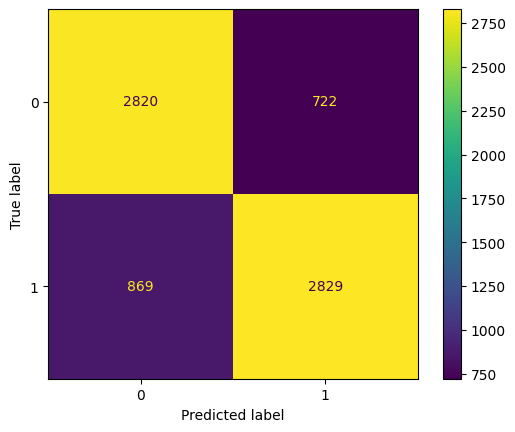

In [64]:
conf_matrix = CM((best_ada_model).predict(X_test), y_test)
disp = CMD(confusion_matrix=conf_matrix)
disp.plot()

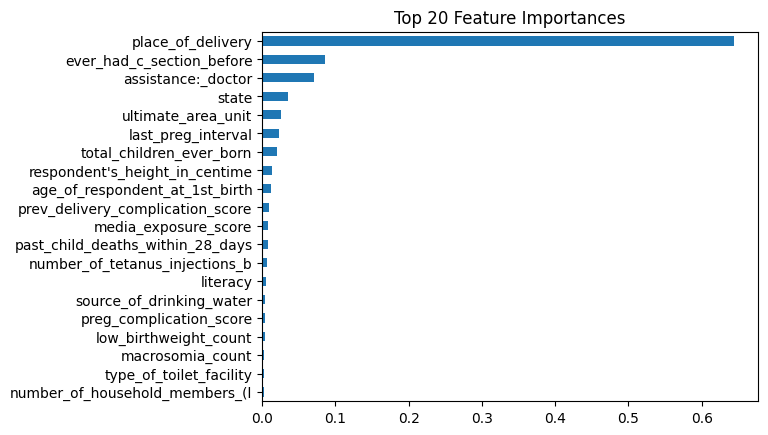

In [65]:
feat_importances = pd.Series(best_ada_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
ada_feat_imp = feat_importances.nlargest(10)
plt.title("Top 20 Feature Importances")
plt.gca().invert_yaxis() 
plt.show()

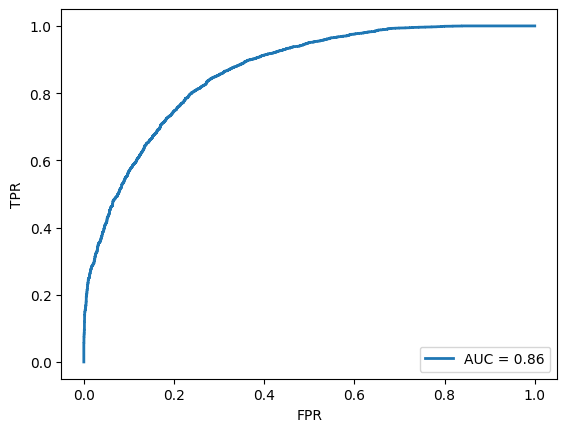

In [66]:
y_scores = best_ada_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
ada_auc = roc_auc * 100
plt.plot(fpr, tpr, lw = 2, label = f'AUC = {roc_auc:.2f}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right') 
plt.show()

In [67]:
y_pred = best_ada_model.predict(X_test)
ada_prec, ada_recall, _, _ = prfs(y_test, y_pred, average='macro')

In [68]:
scores = cross_val_score(best_ada_model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores for each fold:", scores)
print("Mean Accuracy:", scores.mean())

Cross-validation scores for each fold: [0.78480663 0.7890884  0.78687845 0.77941989 0.77427822]
Mean Accuracy: 0.7828943170777686


#### Key points on all models:
- The data shows no multi-collinearity as per correlaion matrix and VIF method which was done during EDA. Model coefficients, especially in linear models such as Logistic Regression, are stable and interpretable. The predictive performance is not compromised by redundant information across features.
- Feature engineering was done perviously as well during EDA, which has widely helped the models created.
- GridSearchSV has been extensively used for all models for hyperparamter tuning, mainly based on accuracy score.
- Cross-validation accuracy denotes similar results using 5-fold cross-validation, showing the model and data are well balanced.

## Results and Analysis

This section presents a concise overview of the machine learning models employed, their respective performances, and a basic interpretation of the outcomes.

#### Basic Results
The key performance metrics considered included Accuracy, Precision, Recall and Area Under the Curve (AUC). The summarised results are as follows:

##### 1. Accuracy

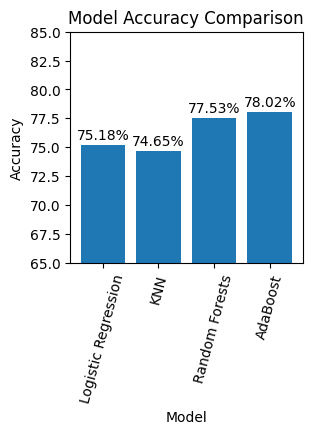

In [69]:
models = ['Logistic Regression', 'KNN', 'Random Forests', 'AdaBoost']
accuracies = [best_lr_model_acc, best_knn_model_acc, best_rf_model_acc, best_ada_model_acc]
plt.figure(figsize=(3, 3))
bars = plt.bar(models, accuracies)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{bar.get_height():.2f}%', ha='center')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=75)
plt.title('Model Accuracy Comparison')
plt.ylim(65, 85)
plt.show()

##### 2. Precision

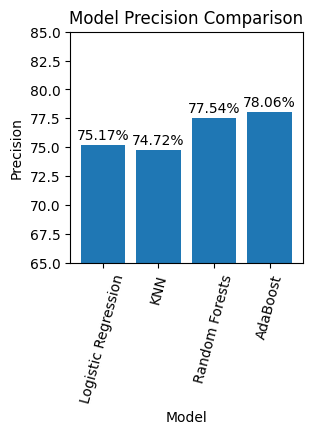

In [70]:
models = ['Logistic Regression', 'KNN', 'Random Forests', 'AdaBoost']
precision = [lr_prec*100, knn_prec*100, rf_prec*100, ada_prec*100]
plt.figure(figsize=(3, 3))
bars = plt.bar(models, precision)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{bar.get_height():.2f}%', ha='center')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation=75)
plt.title('Model Precision Comparison')
plt.ylim(65, 85)
plt.show()

##### 3. Recall

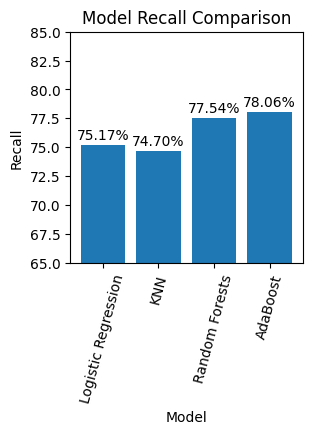

In [71]:
models = ['Logistic Regression', 'KNN', 'Random Forests', 'AdaBoost']
recall = [lr_recall*100, knn_recall*100, rf_recall*100, ada_recall*100]
plt.figure(figsize=(3, 3))
bars = plt.bar(models, recall)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{bar.get_height():.2f}%', ha='center')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.xticks(rotation=75)
plt.title('Model Recall Comparison')
plt.ylim(65, 85)
plt.show()

##### 4. AUC

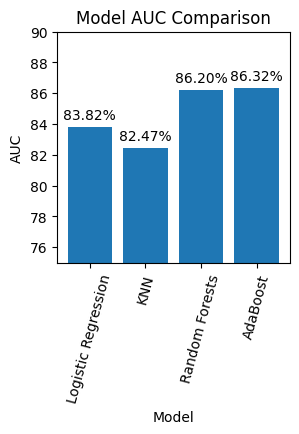

In [72]:
models = ['Logistic Regression', 'KNN', 'Random Forests', 'AdaBoost']
AUC = [lr_auc, knn_auc, rf_auc, ada_auc]
plt.figure(figsize=(3, 3))
bars = plt.bar(models, AUC)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{bar.get_height():.2f}%', ha='center')
plt.xlabel('Model')
plt.ylabel('AUC')
plt.xticks(rotation=75)
plt.title('Model AUC Comparison')
plt.ylim(75, 90)
plt.show()

#### Feature Importance Comparison
Comparison of importance given to features in each model. We will extract and compare top 10 from each model and visualise the same.

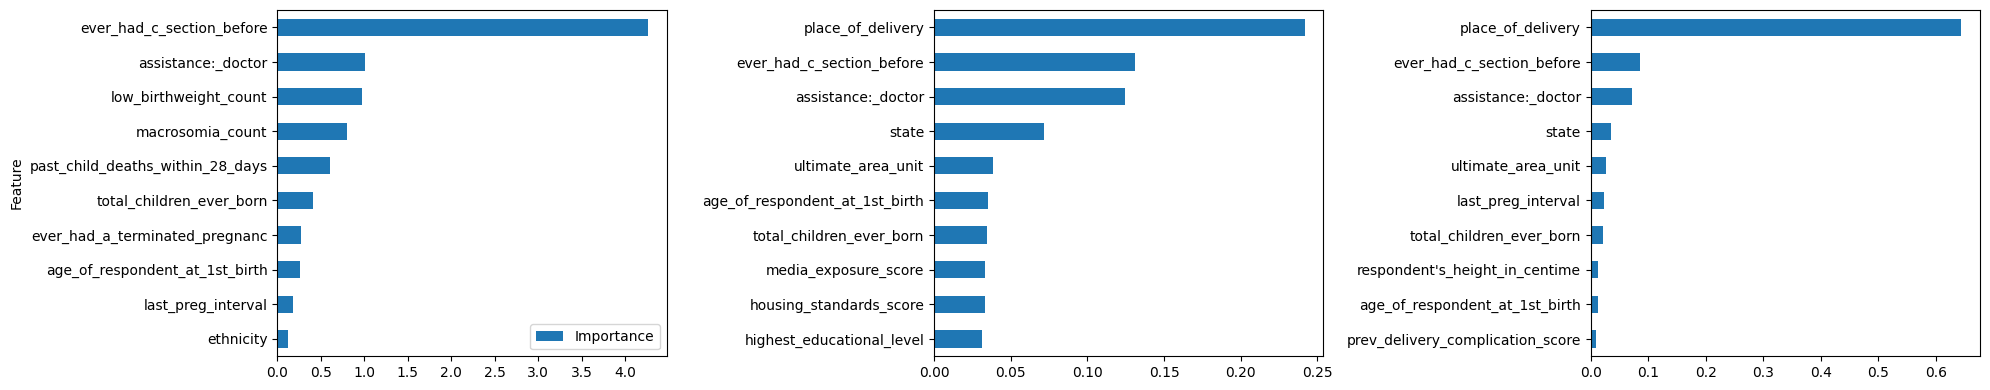

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
lr_feat_imp.plot(kind='barh', x='Feature', y='Importance', ax=axes[0])
rf_feat_imp.plot(kind='barh', ax=axes[1])
ada_feat_imp.plot(kind='barh', ax=axes[2])
for i in range(3):
    axes[i].invert_yaxis()
plt.tight_layout()
plt.show()

**The Results and Analysis section of the project outlines the comparative performance of the machine learning models.**

The following conclusions can be drawn:

**1. Model Performance**  
- AdaBoost emerged as the best-performing model across almost all key metrics (Accuracy, Precision, Recall, AUC). It effectively handled the moderately complex relationships within the dataset, despite limited highly-correlated features.
- Random Forest also performed well, delivering consistent and stable predictions with good generalisation.
- Logistic Regression delivered reasonable performance and offered excellent model interpretability but lacked the predictive depth required for complex patterns in the data.
- K-Nearest Neighbors (KNN) was less effective, especially given the size and dimensionality of the dataset.

**2. Data and Feature Behavior**
- The feature engineering and data cleaning steps performed earlier significantly improved model training outcomes.
- The dataset had relatively low multicollinearity, verified through VIF and correlation matrices, which benefited model stability.  
However, `the absence of critical antenatal biomarkers` and the `skewed distribution of essential features` like previous cesarean history presented limitations to achieving peak model accuracy.

**3. Model Stability**  
Cross-validation using 5-fold CV demonstrated that the results were reproducible and not the result of overfitting, suggesting a well balanced dataset and stable model performance.

## Discussion and Conclusion

#### Key Learnings and Takeaways
- ##### Importance of Data Cleaning and Preprocessing
  - This project reinforced the critical role of data cleaning, imputation, outlier treatment, and feature engineering. Without these steps, no amount of sophisticated modeling would have yielded meaningful or stable results. It became evident that real world datasets like NFHS-5 require substantial manual and automated preprocessing before they are usable for predictive modeling.

- ##### Feature Selection Matters as Much as Model Complexity
  - High dimensional data (initially approx 6000 features) demands aggressive feature reduction to avoid overfitting and computational inefficiency. Selecting features based on domain knowledge, correlation analysis, and variance inflation factors (VIF) proved crucial. This highlighted that better feature selection often yields good results.

- ##### Ensemble Methods
  - Ensemble models (Random Forest and AdaBoost) clearly outperformed simpler classifiers like Logistic Regression and KNN. This validated the power of ensemble techniques in capturing intricate relationships in complex datasets.

- ##### Data Limitations Affect Model Performance
  - Even with excellent modeling and tuning, the performance is ultimately constrained by the quality and richness of the dataset. The absence of crucial medical biomarkers and reliance on self reported survey data limited the upper bound of prediction accuracy.

- ##### Hyperparameter Tuning
  - Without GridSearchCV, the models would have either overfit or underfit. This underlines that model tuning and validation are core components, not optional enhancements.

#### Why Some Things Did Not Work
- ##### Lack of Key Medical Features
  - Important predictors like blood pressure measurements, glucose levels, fetal monitoring data, and gestational complications were missing. Predicting medical outcomes without clinical variables inevitably introduces a significant error margin.

- ##### High Feature Skewness
  - Several important features (e.g., past cesarean history, macrosomia count) were highly skewed. Despite target balancing, the skewness introduced difficulty for classifiers in learning meaningful decision boundaries.

- ##### Limitations of KNN in High Dimensions
  - KNN performed poorly due to the "curse of dimensionality," where distance metrics become less meaningful, and the computational load becomes unsustainable.

#### Recommendations for Future Improvement
- ##### Enrich Dataset with More Medical Features
  - Integrating objective clinical measurements (e.g., blood pressure, blood sugar, fetal weight estimates) would dramatically improve model performance and reliability.

- ##### Feature Engineering and Interaction Terms
  - More sophisticated feature construction, such as interaction terms between antenatal care visits and maternal age or creating composite risk scores, could provide better signal to the models.

- ##### Field Validation and Real-World Testing
  - Before deploying any prediction system based on this model, real world clinical validation is essential to ensure that predictions translate into actionable and trustworthy recommendations.

### Final Closing Statement
This project successfully demonstrated the application of machine learning models, particularly ensemble methods like AdaBoost and Random Forest, to predict the likelihood of cesarean section deliveries using demographic and health survey data. Rigorous data cleaning, feature engineering, and hyperparameter tuning were critical in extracting meaningful insights from a large but imperfect dataset. Despite the absence of key clinical variables and the presence of skewed features, the models achieved stable and reliable performance through systematic validation.  
  
Key challenges included limitations in feature richness, survey bias, and the inherent complexity of predicting medical outcomes from non-clinical data. Future improvements should focus on incorporating richer clinical variables, advanced feature transformations, and more sophisticated algorithms like gradient boosting.  
  
Overall, the project highlights both the promise and the practical challenges of applying machine learning in maternal healthcare risk prediction.